In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:

data = pd.read_csv('datasets/school_dataset.csv')

In [ ]:
data.columns

Index(['student_id', 'student_name', 'class', 'age', 'gender', 'ethnicity',
       'disability_status', 'family_size', 'favorite_subjects',
       'access_to_constant_electricity', 'on_scholarship', 'sleep',
       'average_study_time', 'enjoy_reading', 'enjoy_dancing',
       'enjoy_socialising', 'anxiety_before_during_exams',
       'distance_to_school', 'mode_of_transportation', 'parent_id',
       'parent_name', 'gender_parent', 'email', 'familyIncomeRange',
       'numberOfChildren', 'occupation', 'houseOwnership', 'educationLevel',
       'maritalStatus', 'location', 'age_parent', 'workHoursPerWeek',
       'employmentStatus', 'transportationMode', 'internetAccess',
       'qualification', 'phone_number', 'subject_id', 'attendance_percentage',
       'assignment_score', 'exam_score', 'final_grade', 'academic_record_id',
       'evaluation_date', 'comments', 'point', 'subject', 'totalDaysPresent',
       'attendancePercentage_overall', 'target'],
      dtype='object')

# **DATA OVERVIEW**

In [ ]:
data.head()

,student_id,student_name,class,age,gender,ethnicity,disability_status,family_size,favorite_subjects,access_to_constant_electricity,...,exam_score,final_grade,academic_record_id,evaluation_date,comments,point,subject,totalDaysPresent,attendancePercentage_overall,target
0,OGB/2024/181,Ayo Nduka,Jss 2,12,Female,Igbo,True,3,Business Studies,True,...,90.38,82.98,1644,2024-10-01,Fair performance,6,Basic Technology,63,90.000000,Pass
1,OGB/2024/183,Sadiq Suleiman,SS3,14,Female,Hausa,True,3,Fine Arts,True,...,61.50,69.39,1662,2024-09-15,Good performance,8,Business Studies,60,85.714286,Pass
2,OGB/2024/415,Olamide Abiola,SS3,14,Female,Igbo,False,2,Civic Education,True,...,98.17,88.44,3745,2024-10-04,Good performance,8,Physics,60,85.714286,Fail
3,OGB/2024/309,Obiageli Ogunbiyi,SS3,15,Male,Yoruba,True,1,Agricultural Science,True,...,70.77,79.27,2788,2024-10-01,Very bad performance,0,Economics,58,82.857143,Pass
4,OGB/2024/269,Temitope Okwudili,SS3,16,Female,Igbo,True,4,Computer Studies,True,...,61.81,56.87,2429,2024-09-30,Fair performance,6,Computer Studies,55,78.571429,Fail


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970 entries, 0 to 1969
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   student_id                      1970 non-null   object 
 1   student_name                    1970 non-null   object 
 2   class                           1970 non-null   object 
 3   age                             1970 non-null   int64  
 4   gender                          1970 non-null   object 
 5   ethnicity                       1970 non-null   object 
 6   disability_status               1970 non-null   bool   
 7   family_size                     1970 non-null   object 
 8   favorite_subjects               1970 non-null   object 
 9   access_to_constant_electricity  1970 non-null   bool   
 10  on_scholarship                  1970 non-null   bool   
 11  sleep                           1970 non-null   object 
 12  average_study_time              19

In [ ]:
data.describe()

,age,workHoursPerWeek,phone_number,attendance_percentage,assignment_score,exam_score,final_grade,academic_record_id,point,totalDaysPresent,attendancePercentage_overall
count,1970.000000,1970.000000,1.970000e+03,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000
mean,13.597970,29.363959,2.345401e+12,74.593482,69.780746,71.273030,71.639497,2209.625381,5.636548,59.651777,85.216824
std,2.433638,17.660359,2.567946e+09,14.387627,17.363732,17.247292,11.510691,1296.495264,3.839582,2.953260,4.218943
min,9.000000,0.000000,2.341033e+12,50.000000,40.000000,40.030000,43.580000,0.000000,0.000000,50.000000,71.428571
25%,12.000000,13.000000,2.343269e+12,62.145000,54.580000,56.837500,62.442500,1094.250000,2.000000,58.000000,82.857143
50%,13.000000,28.000000,2.345273e+12,74.695000,69.625000,71.595000,71.880000,2203.500000,6.000000,60.000000,85.714286
75%,15.000000,45.000000,2.347595e+12,87.077500,84.760000,86.265000,80.797500,3359.750000,10.000000,62.000000,88.571429
max,18.000000,60.000000,2.349983e+12,99.960000,99.950000,99.970000,100.000000,4514.000000,10.000000,67.000000,95.714286


In [ ]:
data.isnull().sum()

,0
student_id,0
student_name,0
class,0
age,0
gender,0
ethnicity,0
disability_status,0
family_size,0
favorite_subjects,0
access_to_constant_electricity,0


In [ ]:
numerical_df = data.select_dtypes(include=['number'])

numerical_df

,age,workHoursPerWeek,phone_number,attendance_percentage,assignment_score,exam_score,final_grade,academic_record_id,point,totalDaysPresent,attendancePercentage_overall
0,12,25,2346097934243,55.10,90.32,90.38,82.98,1644,6,63,90.000000
1,14,56,2343871891616,91.96,74.10,61.50,69.39,1662,8,60,85.714286
2,14,45,2342754172765,93.90,48.30,98.17,88.44,3745,8,60,85.714286
3,15,59,2348575427307,93.24,77.13,70.77,79.27,2788,0,58,82.857143
4,16,36,2342659077670,64.43,47.42,61.81,56.87,2429,6,55,78.571429
...,...,...,...,...,...,...,...,...,...,...,...
1965,17,55,2347379186722,67.05,48.02,79.54,69.69,2511,8,55,78.571429
1966,12,37,2343905778118,75.43,57.97,69.00,66.68,2908,10,60,85.714286
1967,11,42,2345873529311,56.55,77.40,85.51,75.90,1898,10,54,77.142857
1968,10,28,2342678206800,97.98,48.70,85.62,83.08,3276,0,59,84.285714


In [ ]:
categorical_df = data.select_dtypes(include=['object', 'bool'])

categorical_df

,student_id,student_name,class,gender,ethnicity,disability_status,family_size,favorite_subjects,access_to_constant_electricity,on_scholarship,...,age_parent,employmentStatus,transportationMode,internetAccess,qualification,subject_id,evaluation_date,comments,subject,target
0,OGB/2024/181,Ayo Nduka,Jss 2,Female,Igbo,True,3,Business Studies,True,True,...,55-64,Part-time,Car,True,Bachelors,subject_4,2024-10-01,Fair performance,Basic Technology,Pass
1,OGB/2024/183,Sadiq Suleiman,SS3,Female,Hausa,True,3,Fine Arts,True,True,...,older,Full-time,Car,True,NaN,subject_8,2024-09-15,Good performance,Business Studies,Pass
2,OGB/2024/415,Olamide Abiola,SS3,Female,Igbo,False,2,Civic Education,True,True,...,35-44,Part-time,Trekking,True,Bachelors,subject_15,2024-10-04,Good performance,Physics,Fail
3,OGB/2024/309,Obiageli Ogunbiyi,SS3,Male,Yoruba,True,1,Agricultural Science,True,True,...,older,Freelance,Trekking,True,Bachelors,subject_17,2024-10-01,Very bad performance,Economics,Pass
4,OGB/2024/269,Temitope Okwudili,SS3,Female,Igbo,True,4,Computer Studies,True,True,...,55-64,Full-time,Bus,True,PhD,subject_24,2024-09-30,Fair performance,Computer Studies,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,OGB/2024/278,Ujunwa Aiyegbusi,SS3,Female,Hausa,False,2,Chemistry,True,True,...,45-54,Freelance,Car,True,NaN,subject_9,2024-09-08,Good performance,Home Economics,Fail
1966,OGB/2024/323,Ngozi Ogunyemi,Jss 2,Female,Yoruba,True,1,Agricultural Science,True,True,...,older,Full-time,Car,True,Bachelors,subject_1,2024-09-26,Excellent performance,Mathematics,Pass
1967,OGB/2024/210,Sadiq Hassan,Jss 2,Female,Yoruba,True,0,History,True,True,...,older,Part-time,Bike,True,Diploma,subject_1,2024-09-25,Excellent performance,Mathematics,Pass
1968,OGB/2024/363,Zainab Okeke,Jss 2,Female,Igbo,True,2,Agricultural Science,True,True,...,35-44,Full-time,Bus,False,NaN,subject_2,2024-09-22,Very bad performance,English Language,Fail


In [ ]:
data.columns

Index(['student_id', 'student_name', 'class', 'age', 'gender', 'ethnicity',
       'disability_status', 'family_size', 'favorite_subjects',
       'access_to_constant_electricity', 'on_scholarship', 'sleep',
       'average_study_time', 'enjoy_reading', 'enjoy_dancing',
       'enjoy_socialising', 'anxiety_before_during_exams',
       'distance_to_school', 'mode_of_transportation', 'parent_id',
       'parent_name', 'gender_parent', 'email', 'familyIncomeRange',
       'numberOfChildren', 'occupation', 'houseOwnership', 'educationLevel',
       'maritalStatus', 'location', 'age_parent', 'workHoursPerWeek',
       'employmentStatus', 'transportationMode', 'internetAccess',
       'qualification', 'phone_number', 'subject_id', 'attendance_percentage',
       'assignment_score', 'exam_score', 'final_grade', 'academic_record_id',
       'evaluation_date', 'comments', 'point', 'subject', 'totalDaysPresent',
       'attendancePercentage_overall', 'target'],
      dtype='object')

# **UNIVARIATE ANALYSIS**

### ***Numerical Variables***

In [ ]:
numerical_df.columns

Index(['age', 'workHoursPerWeek', 'phone_number', 'attendance_percentage',
       'assignment_score', 'exam_score', 'final_grade', 'academic_record_id',
       'point', 'totalDaysPresent', 'attendancePercentage_overall'],
      dtype='object')

In [ ]:
# Summary statistics for numerical variables
numeric_features = ['age', 'attendance_percentage', 'assignment_score', 'exam_score', 'final_grade', 'attendancePercentage_overall']
summary_stats = data[numeric_features].describe()
summary_stats


,age,attendance_percentage,assignment_score,exam_score,final_grade,attendancePercentage_overall
count,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000
mean,13.597970,74.593482,69.780746,71.273030,71.639497,85.216824
std,2.433638,14.387627,17.363732,17.247292,11.510691,4.218943
min,9.000000,50.000000,40.000000,40.030000,43.580000,71.428571
25%,12.000000,62.145000,54.580000,56.837500,62.442500,82.857143
50%,13.000000,74.695000,69.625000,71.595000,71.880000,85.714286
75%,15.000000,87.077500,84.760000,86.265000,80.797500,88.571429
max,18.000000,99.960000,99.950000,99.970000,100.000000,95.714286


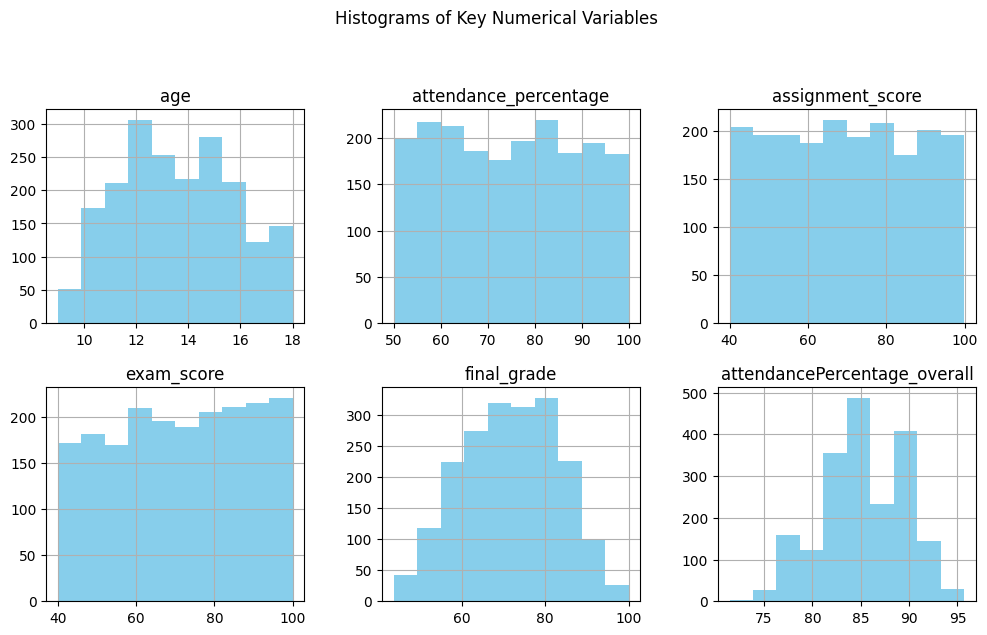

In [ ]:
# Plot histogram for numerical features
data[numeric_features].hist(bins=10, figsize=(12, 10), layout=(3, 3), color='skyblue')
plt.suptitle('Histograms of Key Numerical Variables')
plt.show()


***Insights***

**General Observations**
1. There is an absence of outliers in the exam score, attendance percentage, assignment score.

2. The final grade is normally distributed.

3. Age has a normal distribution

5. Attendance percentage overall has a bimodal distribution.

5. The Exam Score, Assignment Score, and Attendance Percentage exhibit a distribution pattern that is close to uniform.
Suggesting that students are performing at a relatively similar level in both exams and assignments. This could indicate a general consistency in how students are engaging with the curriculum and their level of understanding.

**->Age**

 Age has normal distribution that suggests that most students are around the average age, indicating alignment with the expected age for the educational level they are in.

**->Exam Score**

Exam score distribution is uniform which could mean that the exam may not be effectively distinguishing between students' knowledge levels.
In other words, the exam might not be challenging enough to differentiate between high- and low-performing students, or the exam questions could be designed in a way that doesn't favor any particular group.

**-> Assignment score**

The even spread of scores might imply that the assignments do not effectively differentiate between students’ understanding of the material. If the assignments are not challenging enough or too easy, they may not provide valuable insights into students' actual knowledge and skills.


**->Final grade**

The presence of a normal distribution implies that the assessment tools (exams, assignments, etc.) used to evaluate student performance are effectively calibrated to reflect the overall understanding of the subject matter among the majority of students. This balance indicates that the assessments are neither too easy nor too difficult for the student population as a whole.

While most students fall within the average range, the presence of outliers (students who score significantly higher or lower than the average) should be examined closely. These students may require different levels of support or intervention.

**->Attendance percentage overall**

a bimodal distribution of overall attendance percentages indicates the presence of two distinct groups of students with differing attendance patterns.

The two peaks in attendance may reflect underlying socioeconomic or personal challenges faced by different groups of students. For instance, students with lower attendance might be dealing with issues such as family responsibilities or lack of access to transportation.


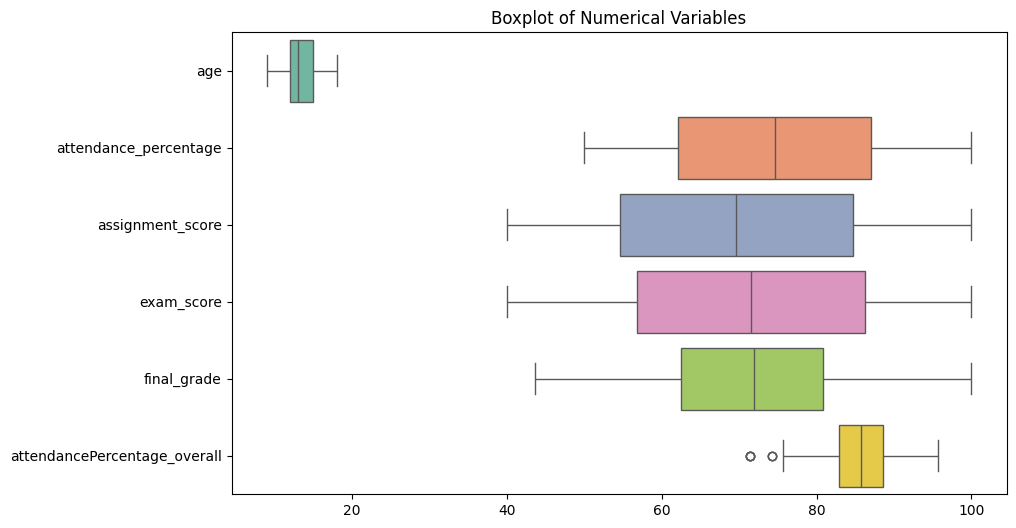

In [ ]:
# Create boxplots for numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numeric_features], orient='h', palette='Set2')
plt.title('Boxplot of Numerical Variables')
plt.show()


### ***Categorical Variables***

In [ ]:
# Frequency distribution for categorical variables
categorical_df = data.select_dtypes(include=['object'])

for col in categorical_df:
    print(f'\nFrequency of {col}:\n', data[col].value_counts())



Frequency of student_id:
 student_id
OGB/2024/181    10
OGB/2024/240    10
OGB/2024/375    10
OGB/2024/493    10
OGB/2024/362    10
                ..
OGB/2024/480     1
OGB/2024/108     1
OGB/2024/406     1
OGB/2024/465     1
OGB/2024/23      1
Name: count, Length: 475, dtype: int64

Frequency of student_name:
 student_name
Ayo Nduka              10
Jumoke Obi             10
Chinyere Adesina       10
Tunde Tajudeen         10
Nkemdilim Balogun      10
                       ..
Ijeoma Aiyegbusi        1
Temitope Awojobi        1
Kanyinsola Akinyemi     1
Chinonso Nwankwo        1
Zainab Okwudili         1
Name: count, Length: 475, dtype: int64

Frequency of class:
 class
SS3      596
Jss 2    368
Jss 3    348
SS1      228
SS2      220
Jss 1    210
Name: count, dtype: int64

Frequency of gender:
 gender
Female    1229
Male       741
Name: count, dtype: int64

Frequency of ethnicity:
 ethnicity
Igbo      728
Yoruba    684
Hausa     558
Name: count, dtype: int64

Frequency of family_size

In [ ]:
data.columns

Index(['student_id', 'student_name', 'class', 'age', 'gender', 'ethnicity',
       'disability_status', 'family_size', 'favorite_subjects',
       'access_to_constant_electricity', 'on_scholarship', 'sleep',
       'average_study_time', 'enjoy_reading', 'enjoy_dancing',
       'enjoy_socialising', 'anxiety_before_during_exams',
       'distance_to_school', 'mode_of_transportation', 'parent_id',
       'parent_name', 'gender_parent', 'email', 'familyIncomeRange',
       'numberOfChildren', 'occupation', 'houseOwnership', 'educationLevel',
       'maritalStatus', 'location', 'age_parent', 'workHoursPerWeek',
       'employmentStatus', 'transportationMode', 'internetAccess',
       'qualification', 'phone_number', 'subject_id', 'attendance_percentage',
       'assignment_score', 'exam_score', 'final_grade', 'academic_record_id',
       'evaluation_date', 'comments', 'point', 'subject', 'totalDaysPresent',
       'attendancePercentage_overall', 'target'],
      dtype='object')

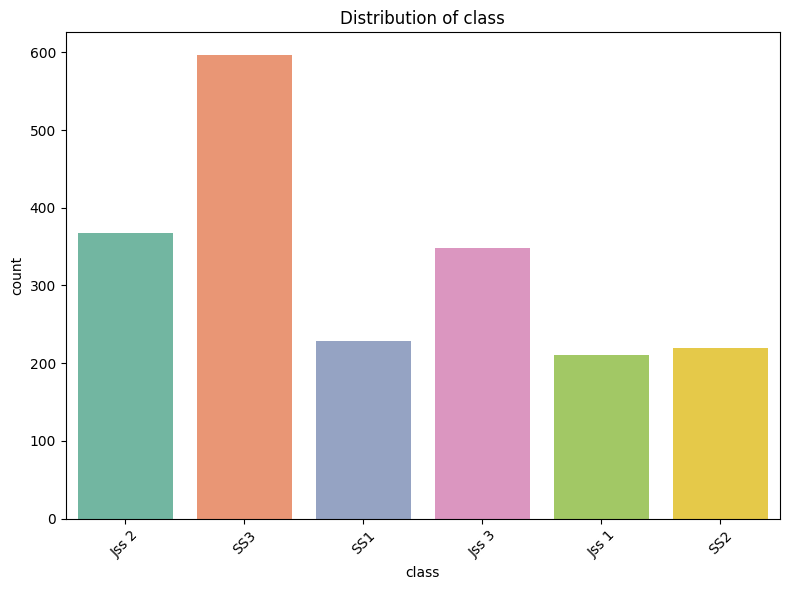

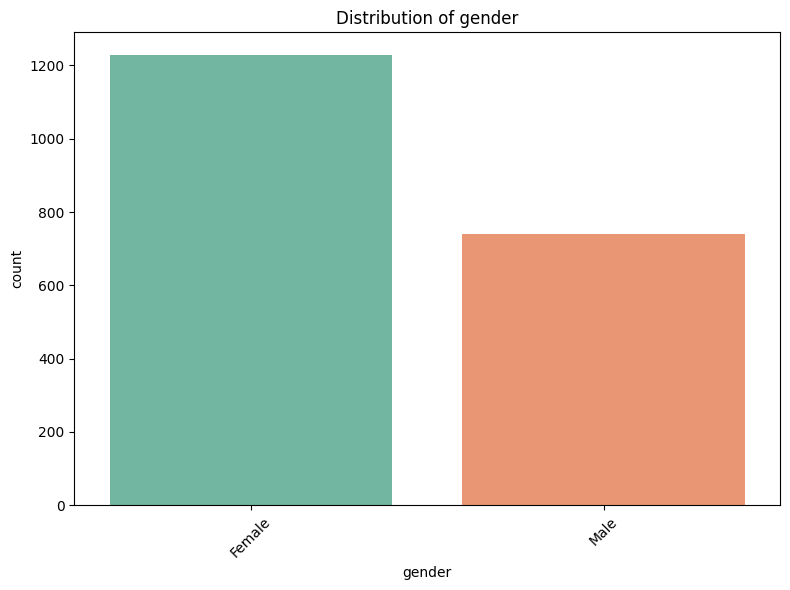

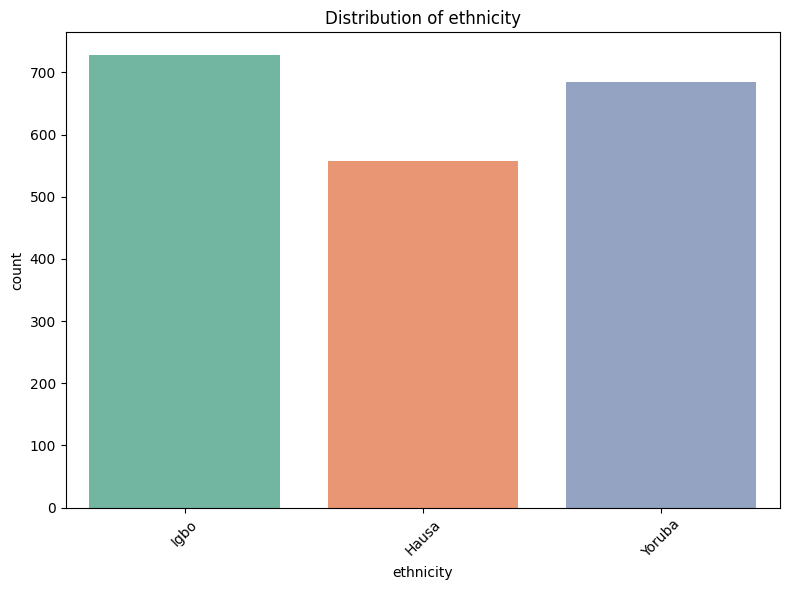

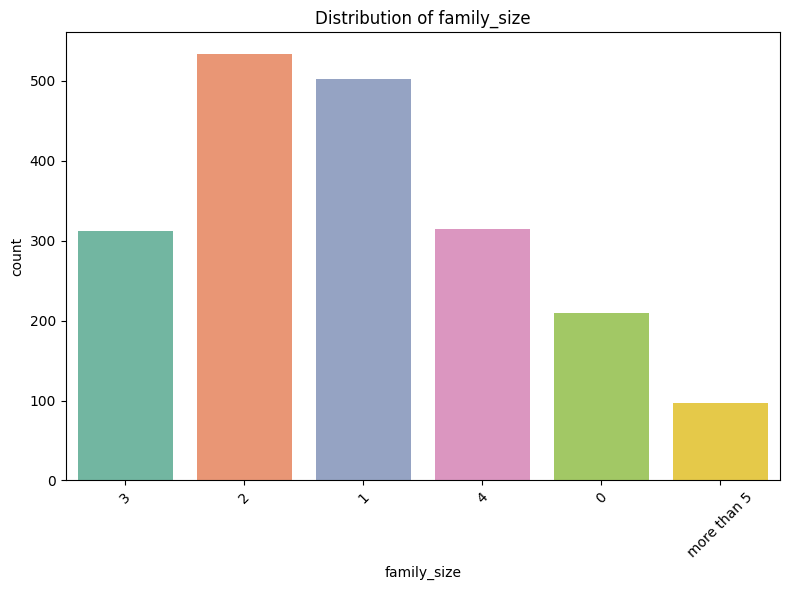

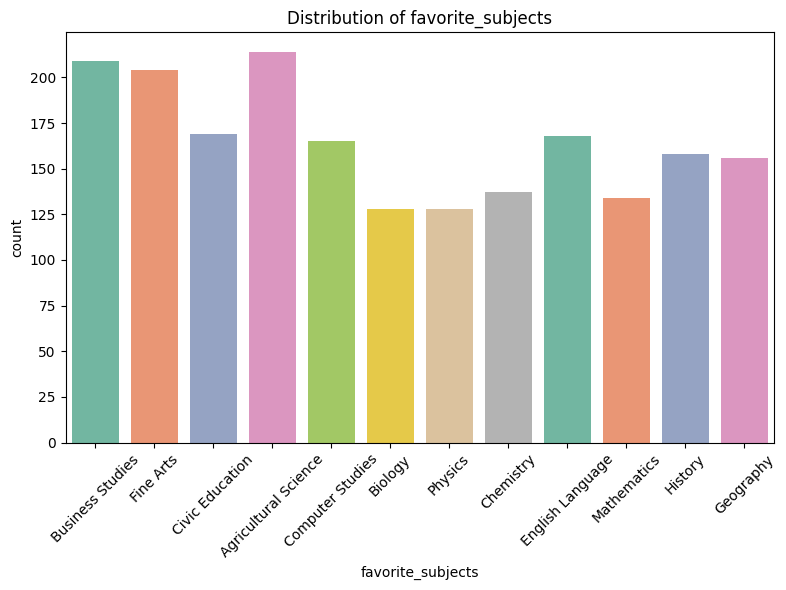

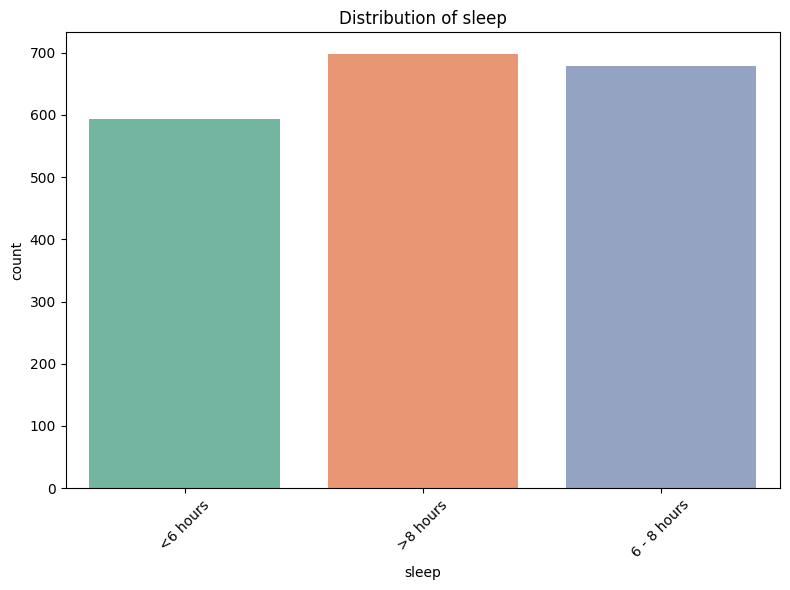

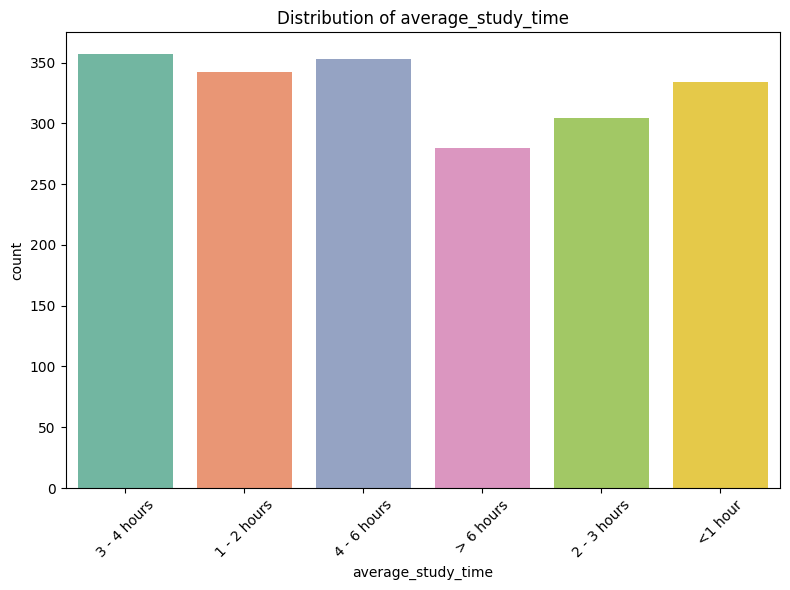

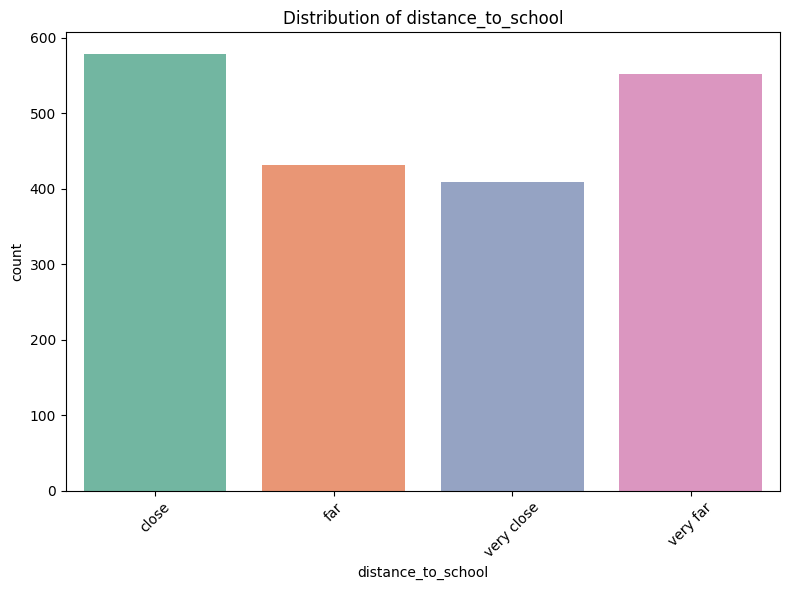

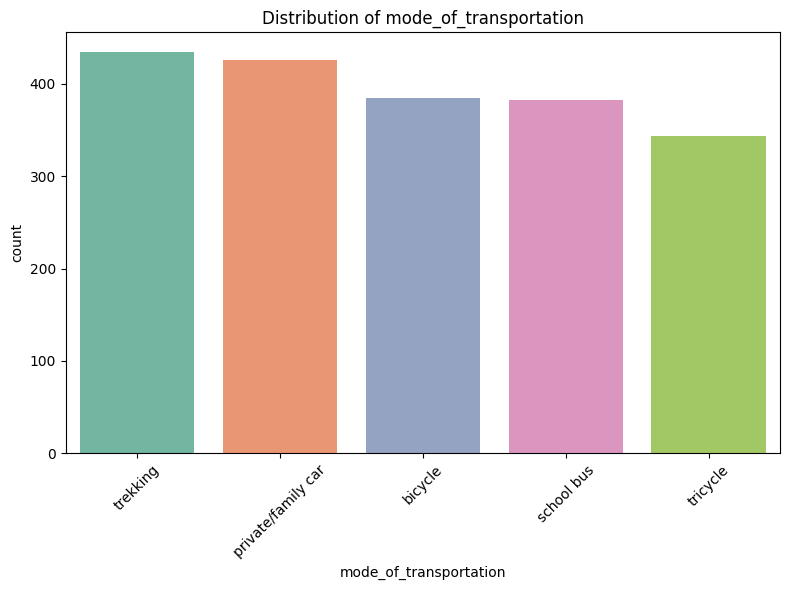

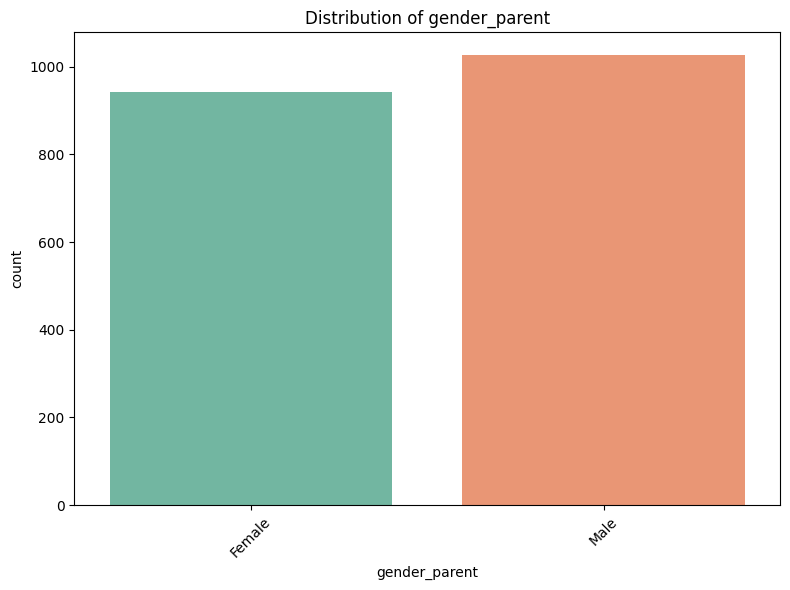

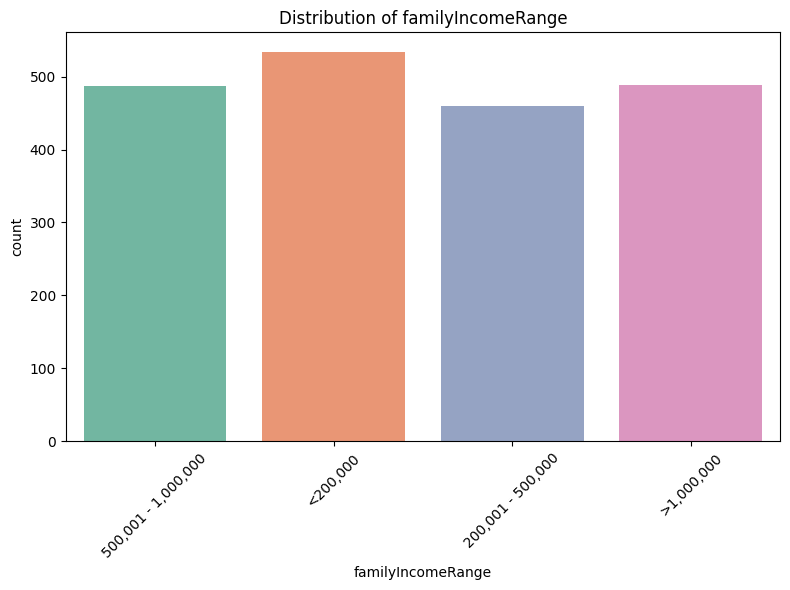

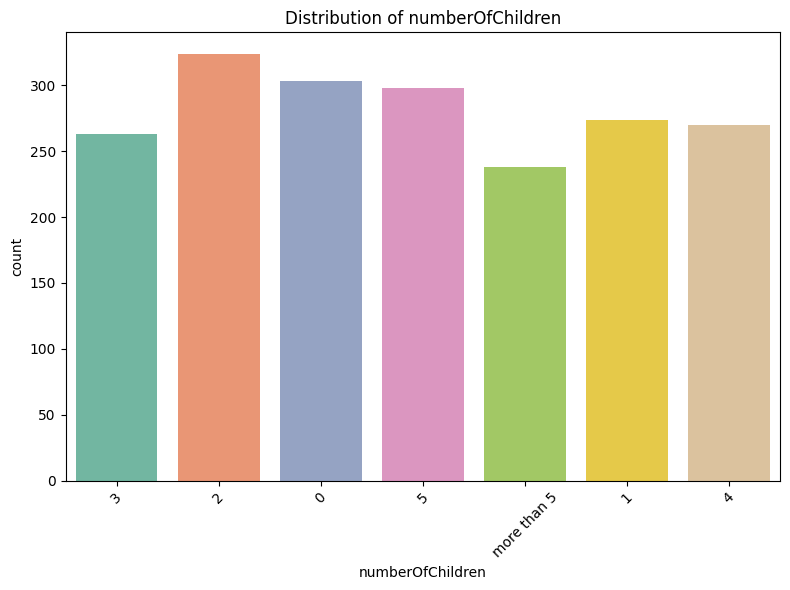

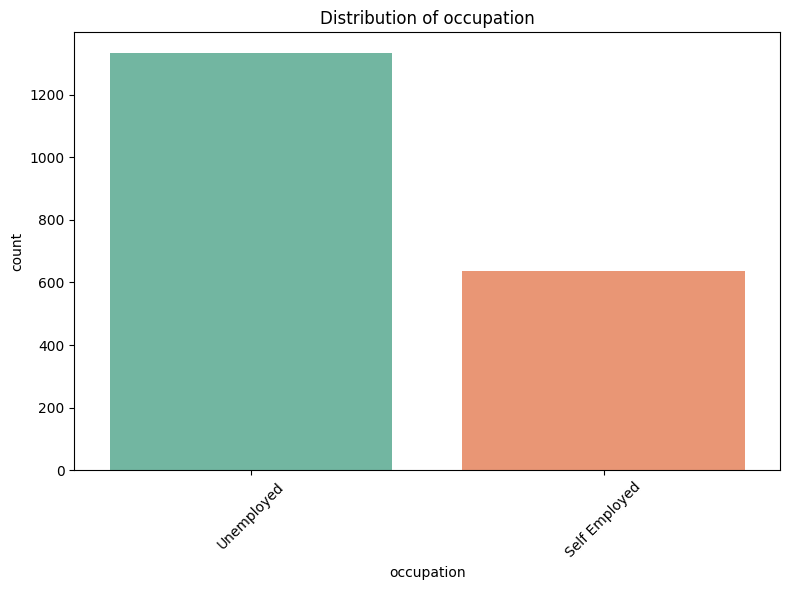

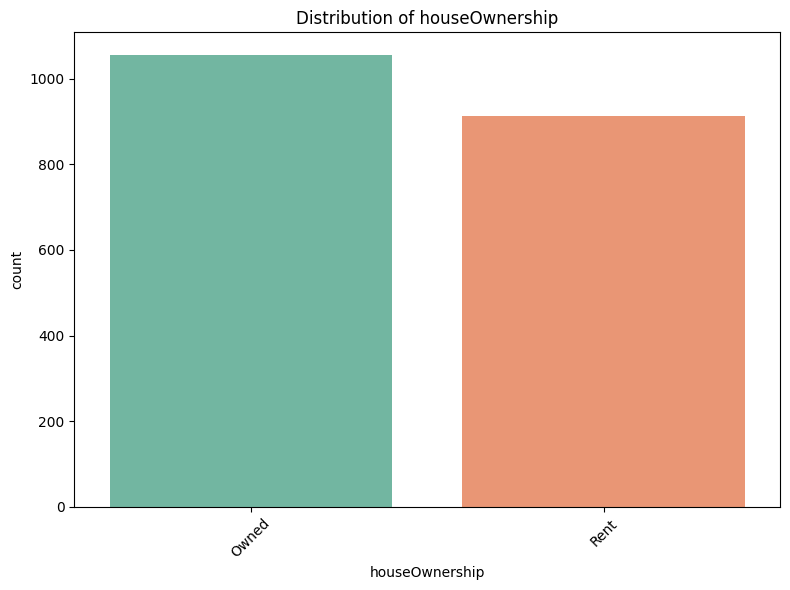

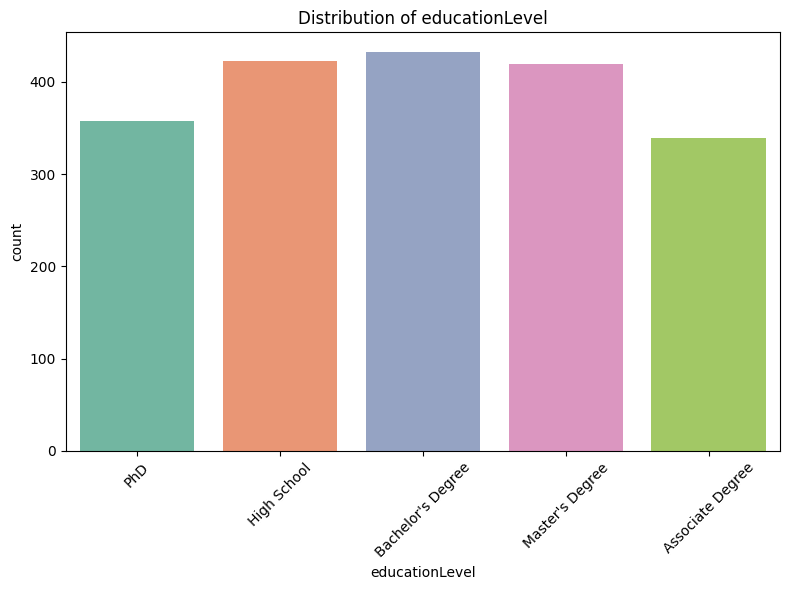

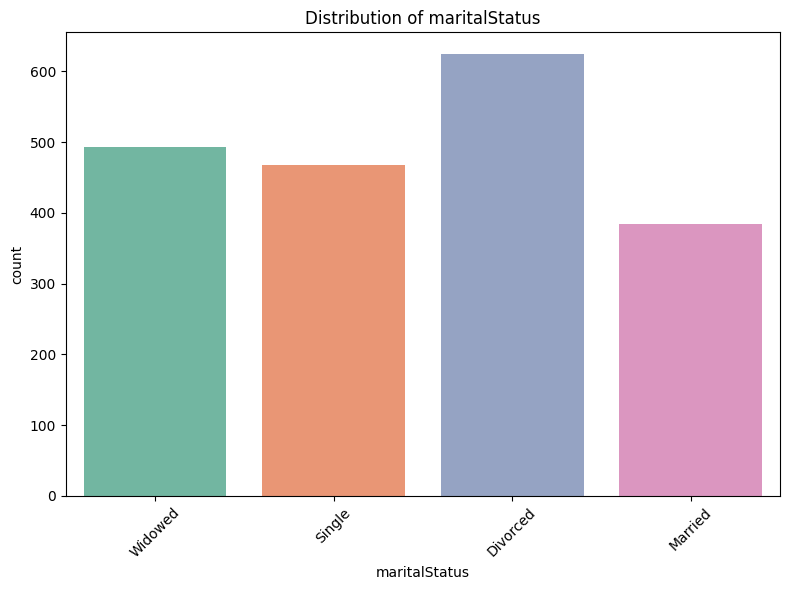

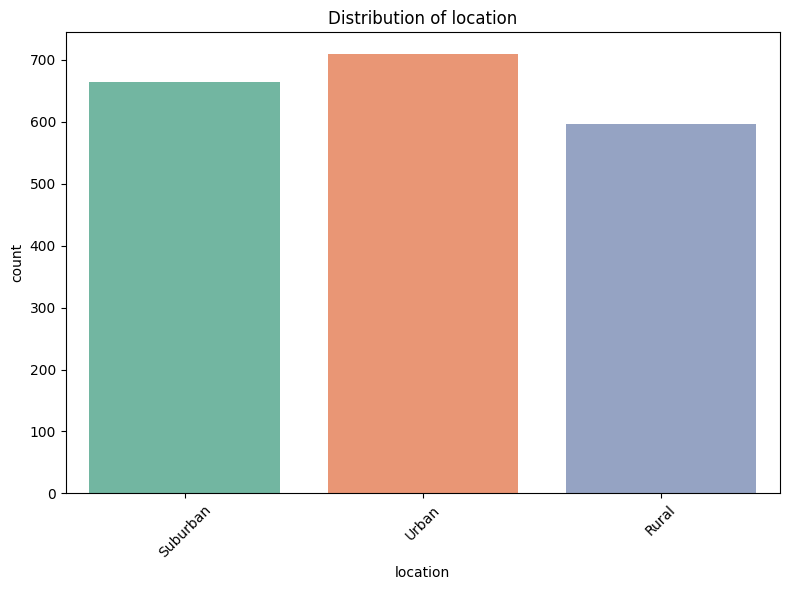

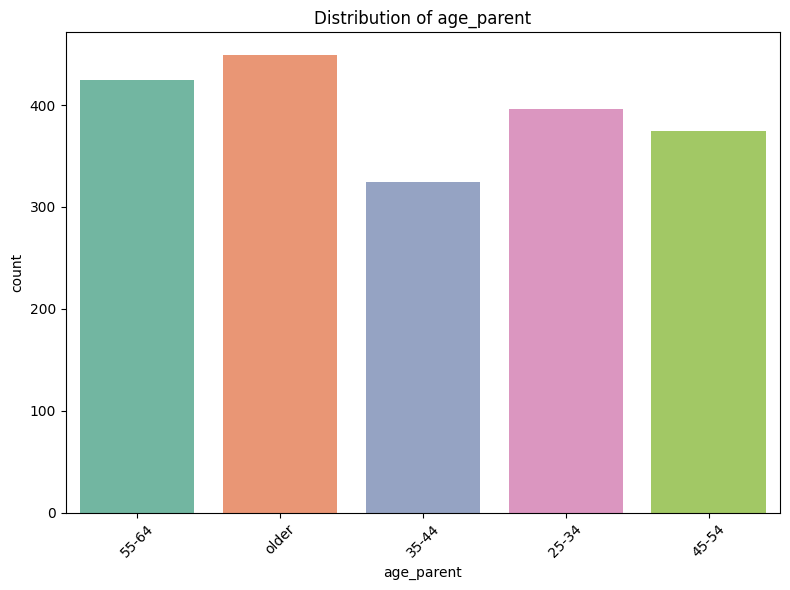

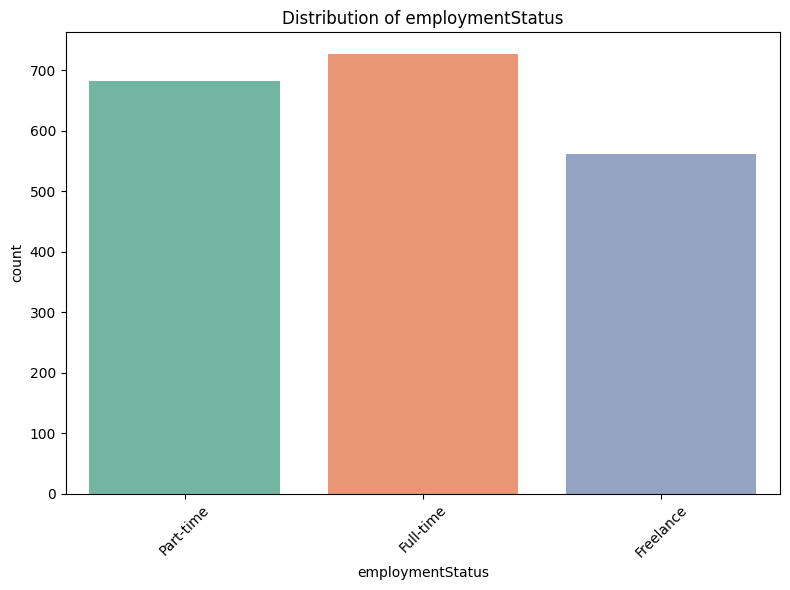

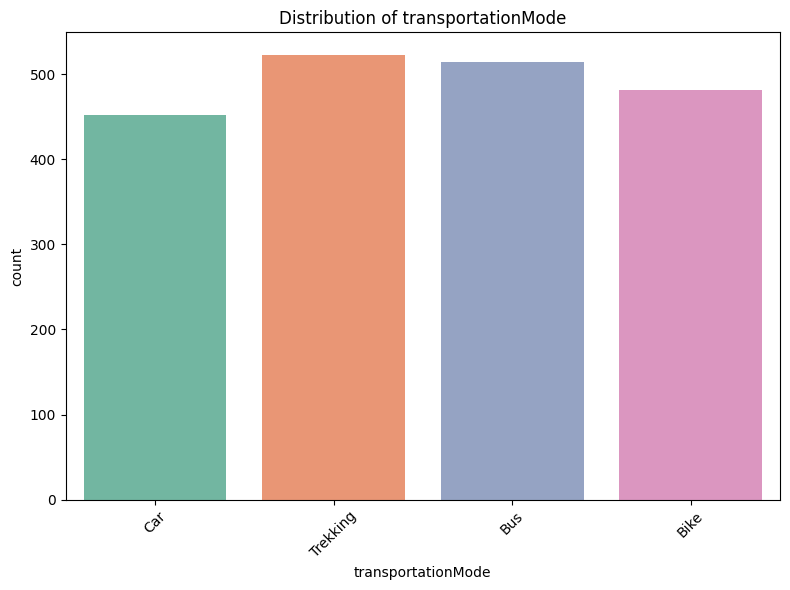

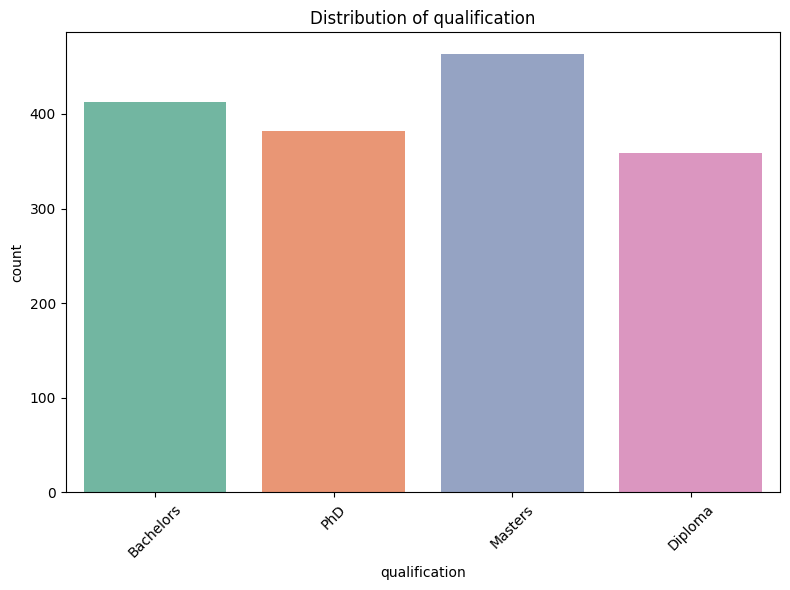

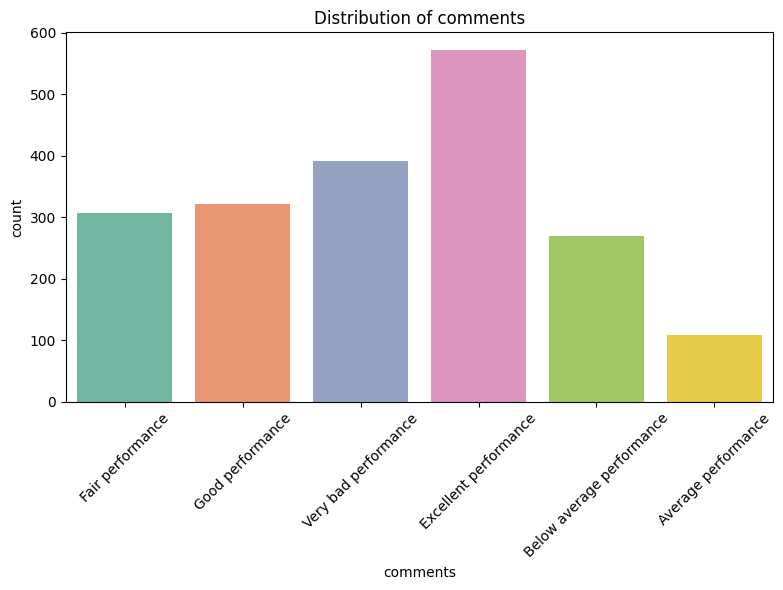

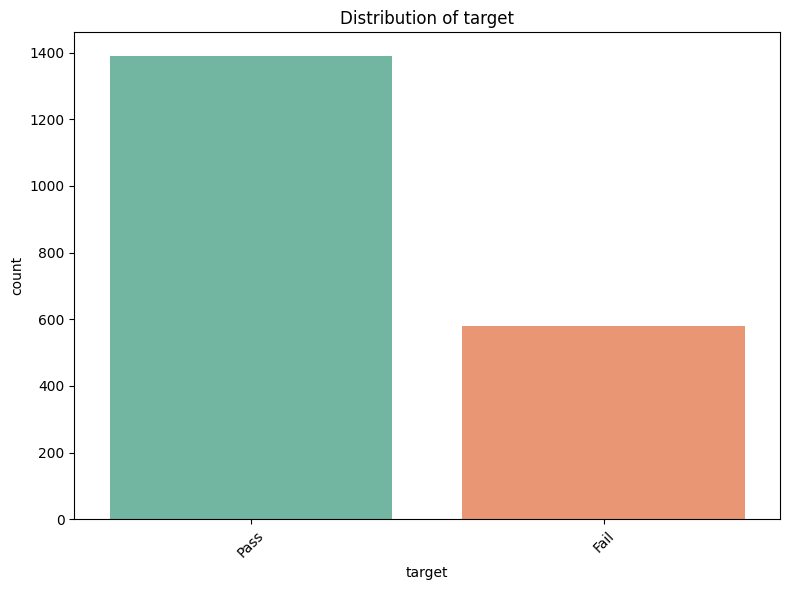

In [ ]:
categorical_bar = categorical_df.drop(columns=['student_name','student_id', 'subject','evaluation_date', 'parent_name','subject_id', 'parent_id','email' ])
# Plot bar plots for all categorical features
for feature in categorical_bar:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data, palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**General Observations**

The categorical bar plots reveal the distribution of different attributes among students, highlighting trends and patterns that can inform educational strategies and interventions.

**-> Average study time**
The bar plot reveals that the most common study durations among students are 4-6 hours, 1-2 hours, and 2-4 hours, while the least common is >6 hours. This distribution highlights the variation in the amount of time students dedicate to studying outside of class.

The distribution of study time among students indicates that most are studying between 4-6 hours, which may be a healthy balance for optimal performance. However, students studying significantly less (1-2 hours) or significantly more (>6 hours) might need targeted interventions to improve their academic outcomes. Schools should explore ways to support students in both categories to ensure they are studying effectively and efficiently, ultimately enhancing their performance and well-being.

**-> Favorite subject**
The bar plot shows that Business Studies, Fine Art, and Agriculture are the most favored subjects, while Biology and Physics have the lowest counts. This distribution reflects students’ preferences and interests in various academic areas.

The subjects students favor can be indicative of potential career paths they might be inclined toward. The popularity of Business Studies could reflect an interest in entrepreneurship, management, or finance, while the interest in Fine Art and Agriculture may signal a leaning toward creative industries or agricultural sciences. Schools can use this information to guide career counseling and provide relevant resources that align with these interests.

**->Distance of school**
The bar plot reveals that the categories "Close" and "Very Far" have the same and significantly highest counts, while "Far" and "Very Close" have the lowest counts. This indicates a distinct grouping of students living either relatively close to or very far from the school, with fewer students in the intermediate distances.
This might be due to the geographic layout of the area, where the school is surrounded by dense populations in close proximity, with a larger gap before encountering more distant residential areas. Understanding this pattern could help the school optimize transportation routes and plan for future growth or outreach to distant communities.

 Additionally, leveraging the advantages of students who live close to the school can enhance participation and academic success. This insight can help guide both immediate actions and long-term strategic planning to serve all students more effectively.


**->Mode of transport**
The bar plot shows that trekking is the most common mode of transport, followed by family car, bicycle, school bus, and finally tricycle in descending order of occurrence. This reflects the commuting habits of students and the available transportation options.


**->Family income range**

The distribution of family income ranges highlights the economic diversity within the student population. The prominence of the middle-income bracket(less than 200,000 and 200,000-500,000), along with the presence of affluent families, suggests that the school environment is likely influenced by varying levels of resources and support. Recognizing the needs of students from lower-income families is essential for implementing effective support programs(scholarships or financial aid).
Schools should leverage these insights to foster an inclusive environment that addresses the unique needs of all students, regardless of their socioeconomic status

**->Occupation**

The bar plot shows that the majority of students come from Unemployed households, with a significantly higher count compared to those from Self-employed households. This insight underscores the importance of understanding the socioeconomic context of students, as it can have profound implications on their educational experiences. Schools should consider targeted interventions and support programs to address these challenges and empower students to overcome barriers to success.

**->Location**

 The bar plot reveals that the suburban and urban categories have the same and significantly higher counts, while rural areas have the lowest representation among students. This distribution indicates that the student population is primarily concentrated in suburban and urban settings.
 While suburban and urban areas benefit from a wealth of resources and opportunities, rural students may face challenges that require targeted interventions. Schools should consider these insights to develop equitable support strategies that enhance the educational experiences of all students, regardless of their location.

### ***Distribution of Target Variable***

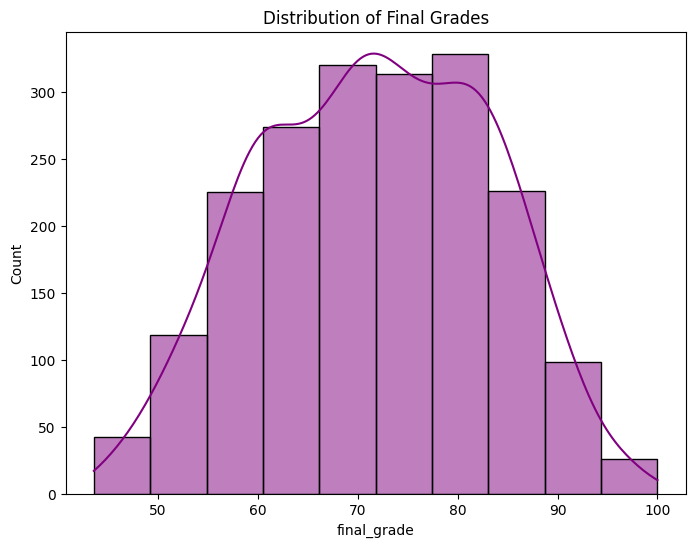

In [ ]:
# Histogram of final grades
plt.figure(figsize=(8, 6))
sns.histplot(data['final_grade'], bins=10, color='purple', kde=True)
plt.title('Distribution of Final Grades')
plt.show()


**Final grade**

Final grade distribution is normal, this indicates that most students are achieving average grades, with scores tapering off symmetrically toward both extremes (high and low).

**1. Majority of Students Performing at an Average Level:**

A normal distribution suggests that a significant proportion of students are scoring around the mean. This can be a positive indication of the overall effectiveness of the curriculum and teaching methods, as it suggests that most students are mastering the material to a reasonable degree.

**2. Balanced Assessment:**

The presence of a normal distribution implies that the assessment tools (exams, assignments, etc.) used to evaluate student performance are effectively calibrated to reflect the overall understanding of the subject matter among the majority of students. This balance indicates that the assessments are neither too easy nor too difficult for the student population as a whole.

**3. Identifying Outliers:**

While most students fall within the average range, the presence of outliers (students who score significantly higher or lower than the average) should be examined closely. These students may require different levels of support or intervention:
High Achievers: Understanding what strategies successful students are employing can inform best practices that might be shared with others.

Struggling Students: Investigating the reasons behind low performance (e.g., personal, social, or academic challenges) can help in developing targeted interventions to assist these students.

**4. Potential for Continuous Improvement:**

A normal distribution allows for clear benchmarks for improvement. Schools can set goals for students and track the percentage of students achieving above or below the average. This data can be crucial for refining teaching methods, adjusting curriculum, and providing targeted support where needed.

Recommendations:

Monitor Trends Over Time: It would be beneficial to analyze whether this normal distribution remains consistent across different cohorts of students and over multiple academic years. Identifying trends can help in proactive educational planning and resource allocation.

Tailored Support Programs: Develop mentorship or tutoring programs focused on students who fall significantly above or below the average to promote best practices among high achievers and provide necessary support to those struggling.

Feedback Mechanisms: Implement regular feedback mechanisms to help students understand their performance in relation to their peers, encouraging them to reflect on their learning strategies and outcomes.

In summary, a normal distribution of final grades indicates a well-balanced performance among students, suggesting effective teaching and assessment practices. However, continued monitoring and targeted interventions for outliers can further enhance overall academic performance.

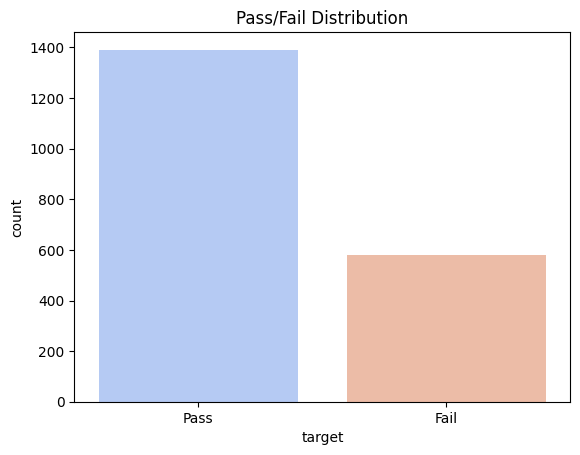

In [ ]:
# Bar plot for pass/fail target variable
sns.countplot(x='target', data=data, palette='coolwarm')
plt.title('Pass/Fail Distribution')
plt.show()


**Overall Pass Rate:**

The plot indicates that there is a higher count of students who passed compared to those who failed. This suggests a positive trend in student performance within the dataset.

While the majority of students are passing, the presence of failing students signifies that there is still a segment of the population that requires attention. This group might need additional support or targeted interventions to improve their academic performance.

# **BIVARIATE/MULTIVARIATE ANALYSIS**

## **(Identifying Exam Challenges)**

### ***A. Behavioral and Emotional Factors Affecting Exam Performance***

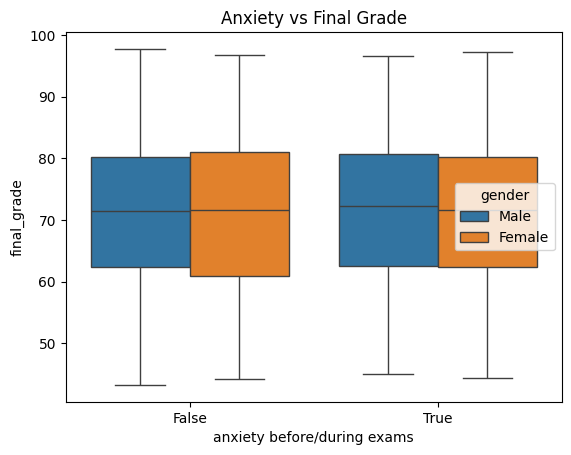

In [ ]:
# Anxiety vs Final Grade
sns.boxplot(x='anxiety before/during exams', y='final_grade', data=data, hue='gender')
plt.title('Anxiety vs Final Grade')
plt.show()

**Insight**

There is no significant difference in final grades across the presence and absence of anxiety, This indicate that anxiety does not heavily influence academic performance for both genders.

In [ ]:
data.columns

Index(['student_id', 'student_name', 'class', 'age', 'gender', 'ethnicity',
       'disability_status', 'family_size', 'favorite_subjects',
       'access_to_constant_electricity', 'on_scholarship', 'sleep',
       'average_study_time', 'enjoy_reading', 'enjoy_dancing',
       'enjoy_socialising', 'anxiety_before_during_exams',
       'distance_to_school', 'mode_of_transportation', 'parent_id',
       'parent_name', 'gender_parent', 'email', 'familyIncomeRange',
       'numberOfChildren', 'occupation', 'houseOwnership', 'educationLevel',
       'maritalStatus', 'location', 'age_parent', 'workHoursPerWeek',
       'employmentStatus', 'transportationMode', 'internetAccess',
       'qualification', 'phone_number', 'subject_id', 'attendance_percentage',
       'assignment_score', 'exam_score', 'final_grade', 'academic_record_id',
       'evaluation_date', 'comments', 'point', 'subject', 'totalDaysPresent',
       'attendancePercentage_overall', 'target'],
      dtype='object')

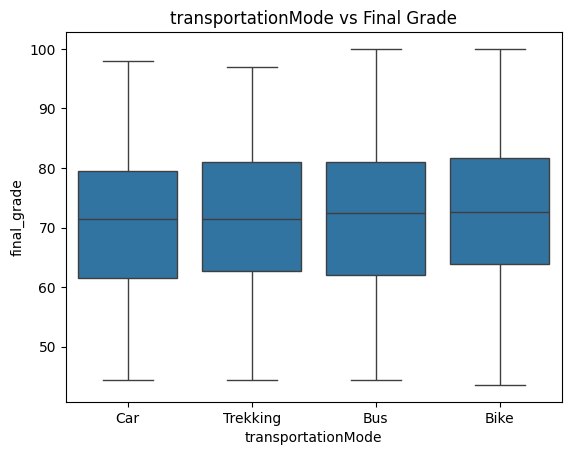

In [ ]:
# Average mode of transport vs Final Grade
sns.boxplot(x='transportationMode', y='final_grade', data=data)
plt.title('transportationMode vs Final Grade')
plt.show()

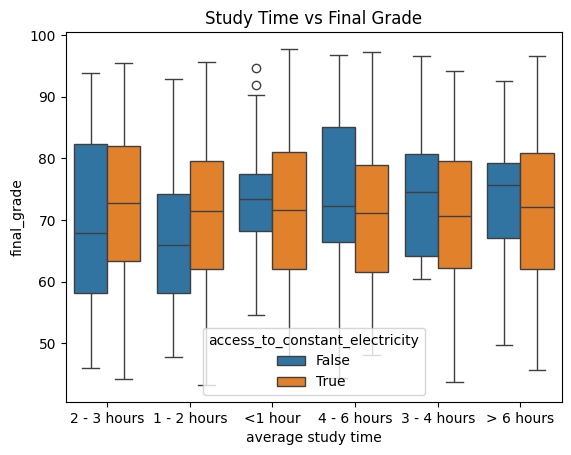

In [ ]:
# Average Study Time vs Final Grade
sns.boxplot(x='average study time', y='final_grade', data=data, hue= 'access_to_constant_electricity')
plt.title('Study Time vs Final Grade')
plt.show()

**Insight**

The boxplot shows how final grades vary across different ranges of average study time, and how this relationship is influenced by students' access to constant electricity.

Students who study for 4-6 hours tend to have higher final grades on average compared to those who study less. This suggests that a moderate and sustained study routine positively correlates with improved academic performance.

The boxplot indicates that moderate study time coupled with access to constant electricity does not heavily influences final grades.

 Educators should guide students in developing effective study habits that focus on quality rather than quantity. Encouraging students to target a 4-6 hour study window while also ensuring that they have proper access to resources could help improve academic performance.

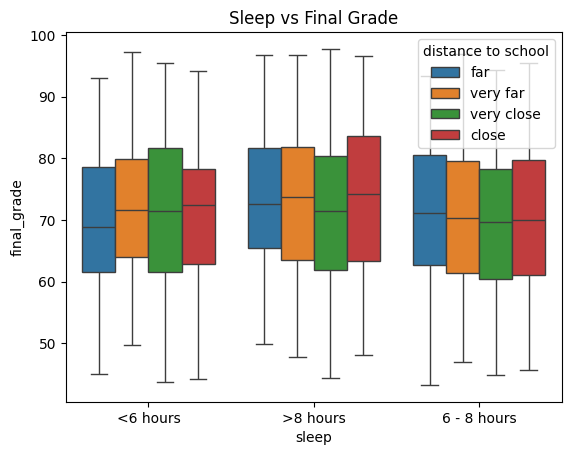

In [ ]:
# Sleep vs Final Grade
sns.boxplot(x='sleep', y='final_grade', data=data, hue='distance to school')
plt.title('Sleep vs Final Grade')
plt.show()

**Insights**

The boxplot provides a comparison of final grades against different levels of sleep that students are getting, segmented by their distance to school (hue). This analysis reveals how both the amount of sleep and the distance students need to travel impact academic performance.

the boxplot shows that students who get more sleep (>8 hours) and live close to school tend to have higher final grades, this suggests that sleep is a key factor in academic success.Adequate rest may improve focus, memory retention, and cognitive function, all of which are important for performance in exams and assignments.


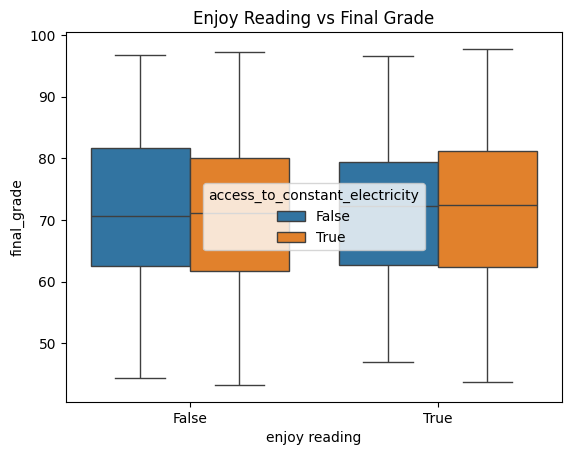

In [ ]:
# Enjoy Reading vs Final Grade
sns.boxplot(x='enjoy reading', y='final_grade', data=data, hue= 'access_to_constant_electricity')
plt.title('Enjoy Reading vs Final Grade')
plt.show()

 The boxplot shows the distribution of Final Grades for students who enjoy reading compared to those who do not, further divided by whether they have access to constant electricity.

 the boxplot shows that students who report enjoying reading tend to have higher final grades, this suggest that a love for reading correlates positively with academic performance.

 This analysis suggests that both enjoyment of reading and access to constant electricity are significant factors influencing academic performance.

 Targeted interventions to foster reading habits and address electricity access could lead to meaningful improvements in student performance.

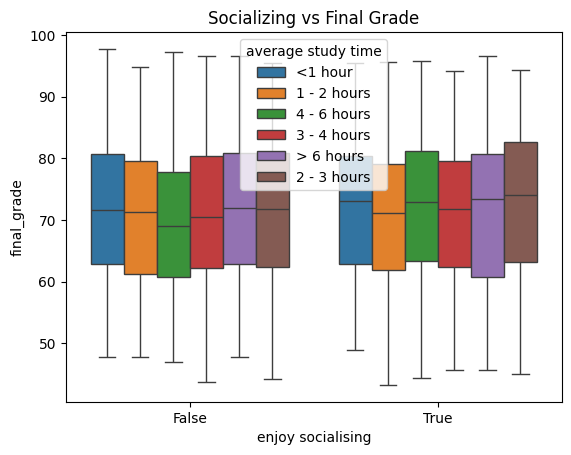

In [ ]:
# Enjoy Socializing vs Final Grade
sns.boxplot(x='enjoy socialising', y='final_grade', data=data,  hue= 'average study time')
plt.title('Socializing vs Final Grade')
plt.show()

***Insights***
The boxplot shows the relationship between how much students enjoy socializing and their final grades, while also considering their average study time.

 This analysis reveals no significant difference between students who enjoy socializing and those who do not in terms of their final grade. This suggests that socializing itself may not be a key determinant of academic success.

 Since socializing does not seem to affect final grades significantly, it could imply that study time and study quality are the most critical factors. This suggests that students can socialize as much as they like, as long as they dedicate enough time to studying. In this case, fostering good time management practices and encouraging efficient study strategies could be more effective in improving academic performance than simply limiting social activities.

 Interventions and policies should therefore prioritize academic support strategies over restrictions on social activities, while ensuring that students are guided to manage their time effectively.




### ***B. External Factors Affecting Exam Performance***

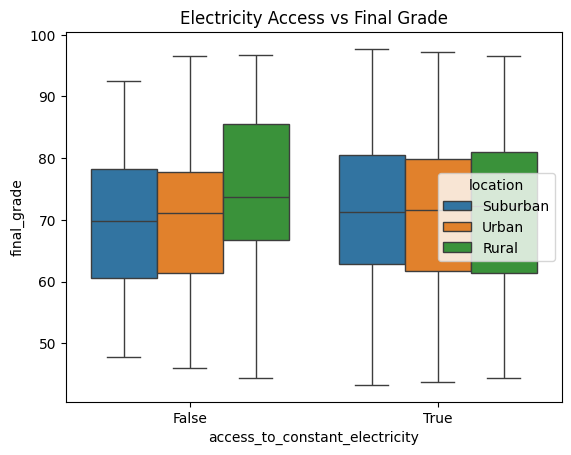

In [ ]:
# Access to Electricity vs Final Grade
sns.boxplot(x='access_to_constant_electricity', y='final_grade', data=data, hue='location')
plt.title('Electricity Access vs Final Grade')
plt.show()

The box plot visualizes the relationship between students' access to constant electricity and their final grades, with an additional distinction made by location (likely urban vs rural or other categories).

The box plot reveals an unexpected result where students in rural areas, despite having no access to constant electricity, achieve the highest final grades.

This suggests that factors such as motivation, adaptability, and community support may play an essential role in academic success.This insight points to the importance of understanding the broader context of students' lives—beyond just access to physical infrastructure—and calls for further investigation into how schools and communities in rural areas are fostering high academic performance under challenging circumstances.

Despite these surprising results, it is important not to downplay the importance of infrastructure like electricity. Investing in electricity and technological resources in rural areas could still further enhance students' learning opportunities, potentially leading to even better performance.

### ***C. Patterns in Student Demographics Indicate Exam-related Struggles***

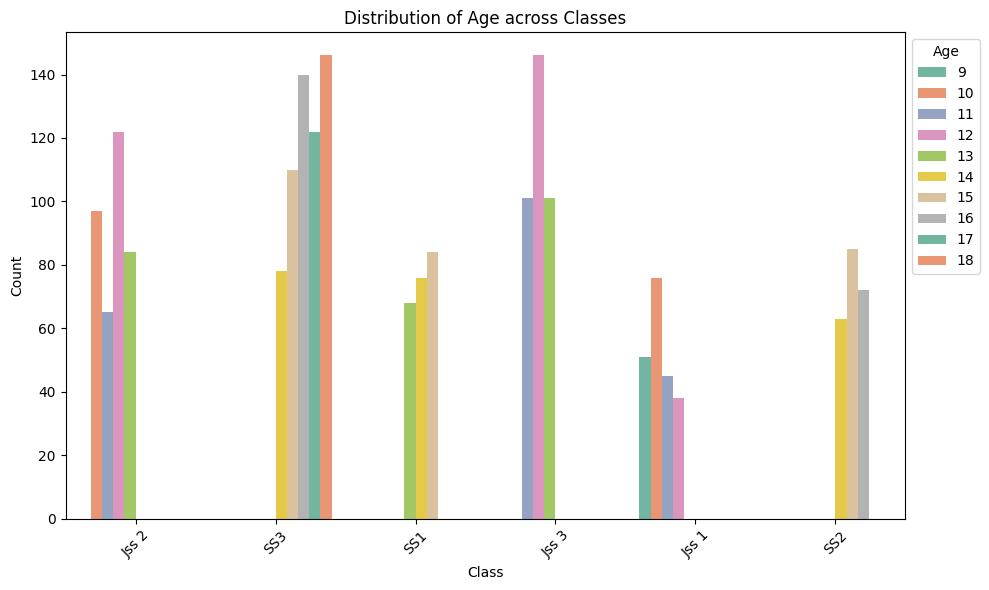

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'age' is a numerical feature and 'class' is categorical
plt.figure(figsize=(10, 6))
sns.countplot(x='class', hue='age', data=data, palette='Set2')

plt.title('Distribution of Age across Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


The plot shows the distribution of student ages across different classes, with each class containing students of various age groups.

The plot shows that SS3 class have a wider range of ages, this may indicate that students of different educational backgrounds or circumstances (e.g., repeating a grade, accelerated progression) are grouped together. This variability can lead to differences in maturity, learning pace, and comprehension, which may influence overall class performance.

 Schools should consider these dynamics when developing interventions or support programs to maximize the success of students across different age groups.

In [ ]:
data.columns

Index(['student_id', 'student_name', 'class', 'age', 'gender', 'ethnicity',
       'disability_status', 'family_size', 'favorite_subjects',
       'access_to_constant_electricity', 'on_scholarship', 'sleep',
       'average_study_time', 'enjoy_reading', 'enjoy_dancing',
       'enjoy_socialising', 'anxiety_before_during_exams',
       'distance_to_school', 'mode_of_transportation', 'parent_id',
       'parent_name', 'gender_parent', 'email', 'familyIncomeRange',
       'numberOfChildren', 'occupation', 'houseOwnership', 'educationLevel',
       'maritalStatus', 'location', 'age_parent', 'workHoursPerWeek',
       'employmentStatus', 'transportationMode', 'internetAccess',
       'qualification', 'phone_number', 'subject_id', 'attendance_percentage',
       'assignment_score', 'exam_score', 'final_grade', 'academic_record_id',
       'evaluation_date', 'comments', 'point', 'subject', 'totalDaysPresent',
       'attendancePercentage_overall', 'target'],
      dtype='object')

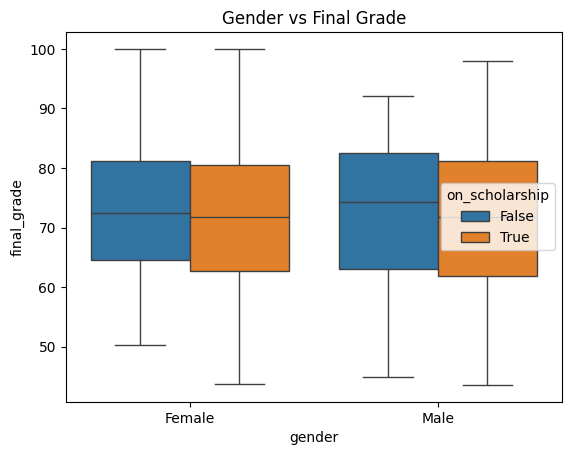

In [ ]:
# Gender vs Final Grade
sns.boxplot(x='gender', y='final_grade', data=data, hue='on_scholarship')
plt.title('Gender vs Final Grade')
plt.show()


 The box plot shows the distribution of final grades for male and female students, categorized by whether they are on a scholarship or not.

the box plot shows that male gender consistently has higher median grades than the female, this indicate that gender plays a role in influencing academic performance.

The box plot shows that male and female students who are not on scholarships have the highest median final grades, which is an interesting and perhaps unexpected result.

The fact that male and female students without scholarships have the highest final grades
suggest that these students are less dependent on financial aid and perhaps come from more privileged backgrounds. This insight is confirmed from the plot of family income range vs final grade categorized by whether they are on a scholarship or not can hepl us.

This could indicate that scholarships alone are not enough to boost academic performance for male students, and other factors such as intrinsic motivation, family support, or social expectations play a larger role in their success. Schools may want to review their scholarship programs to ensure that they are providing not only financial aid but also the right academic and emotional support to all students.

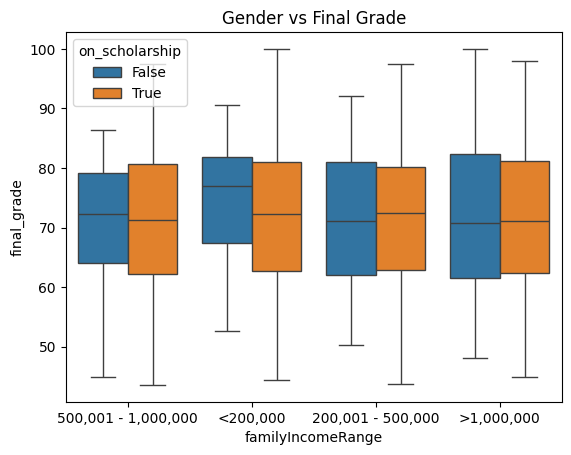

In [ ]:
# Family income range vs Final Grade
sns.boxplot(x='familyIncomeRange', y='final_grade', data=data, hue='on_scholarship')
plt.title('Gender vs Final Grade')
plt.show()


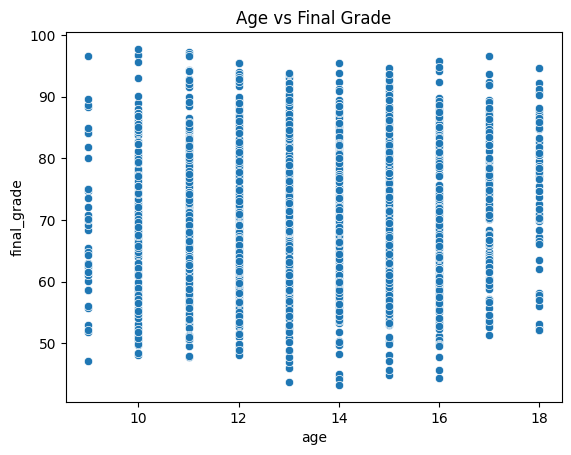

In [ ]:
# Age vs Final Grade
sns.scatterplot(x='age', y='final_grade', data=data)
plt.title('Age vs Final Grade')
plt.show()


The scatter plot shows the relationship between Age and Final Grade. Points represent individual students, with their age on the x-axis and final grade on the y-axis.

The scatterplot indicate that students of the same age are achieving a broad range of final grades, suggesting that age may not have a significant or consistent influence on academic performance

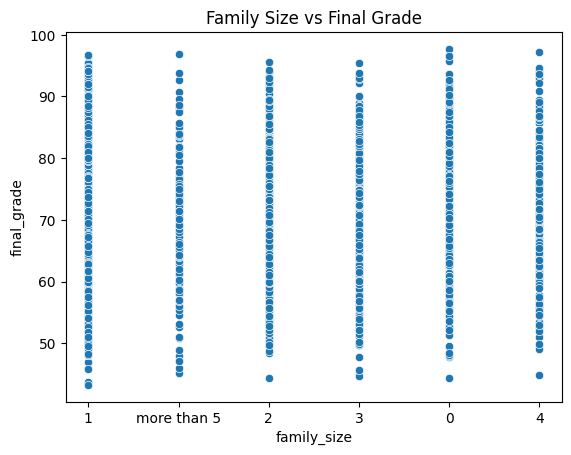

In [ ]:
# Family Size vs Final Grade
sns.scatterplot(x='family_size', y='final_grade', data=data)
plt.title('Family Size vs Final Grade')
plt.show()


The scatterplot indicate that students of the same family size are achieving a broad range of final grades, suggesting that age may not have a significant or consistent influence on academic performance

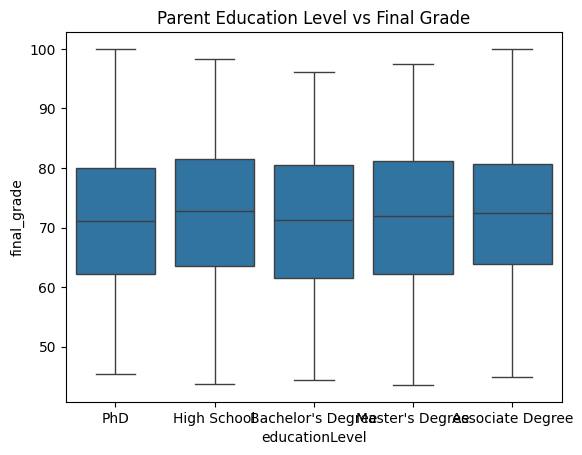

In [ ]:
# Parental Education Level vs Final Grade
sns.boxplot(x='educationLevel', y='final_grade', data=data)
plt.title('Parent Education Level vs Final Grade')
plt.show()


The box plot shows that there is little to no difference in student final grades across the different levels of parental education. This suggests that a student’s performance is not heavily influenced by their parent's education level.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


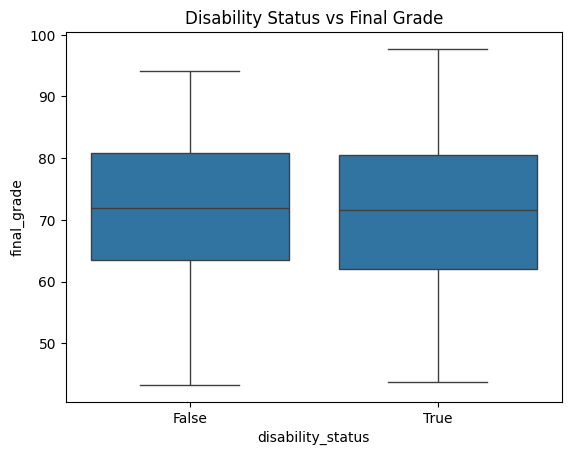

In [ ]:
# Disability Status vs Final Grade
sns.boxplot(x='disability_status', y='final_grade', data=data)
plt.title('Disability Status vs Final Grade')
plt.show()


The box plot shows that there is no significant difference in the final grades between students with and without disabilities. Both groups have similar median final grades and comparable distributions, indicating that disability status does not appear to have a strong influence on academic performance.

The lack of a significant difference in final grades between students with and without disabilities indicates that the school has established an inclusive educational system where students with disabilities are receiving adequate support to perform on par with their peers. While this is a positive outcome, continued monitoring and exploration of other aspects of student experience will ensure that all students continue to thrive academically and personally.

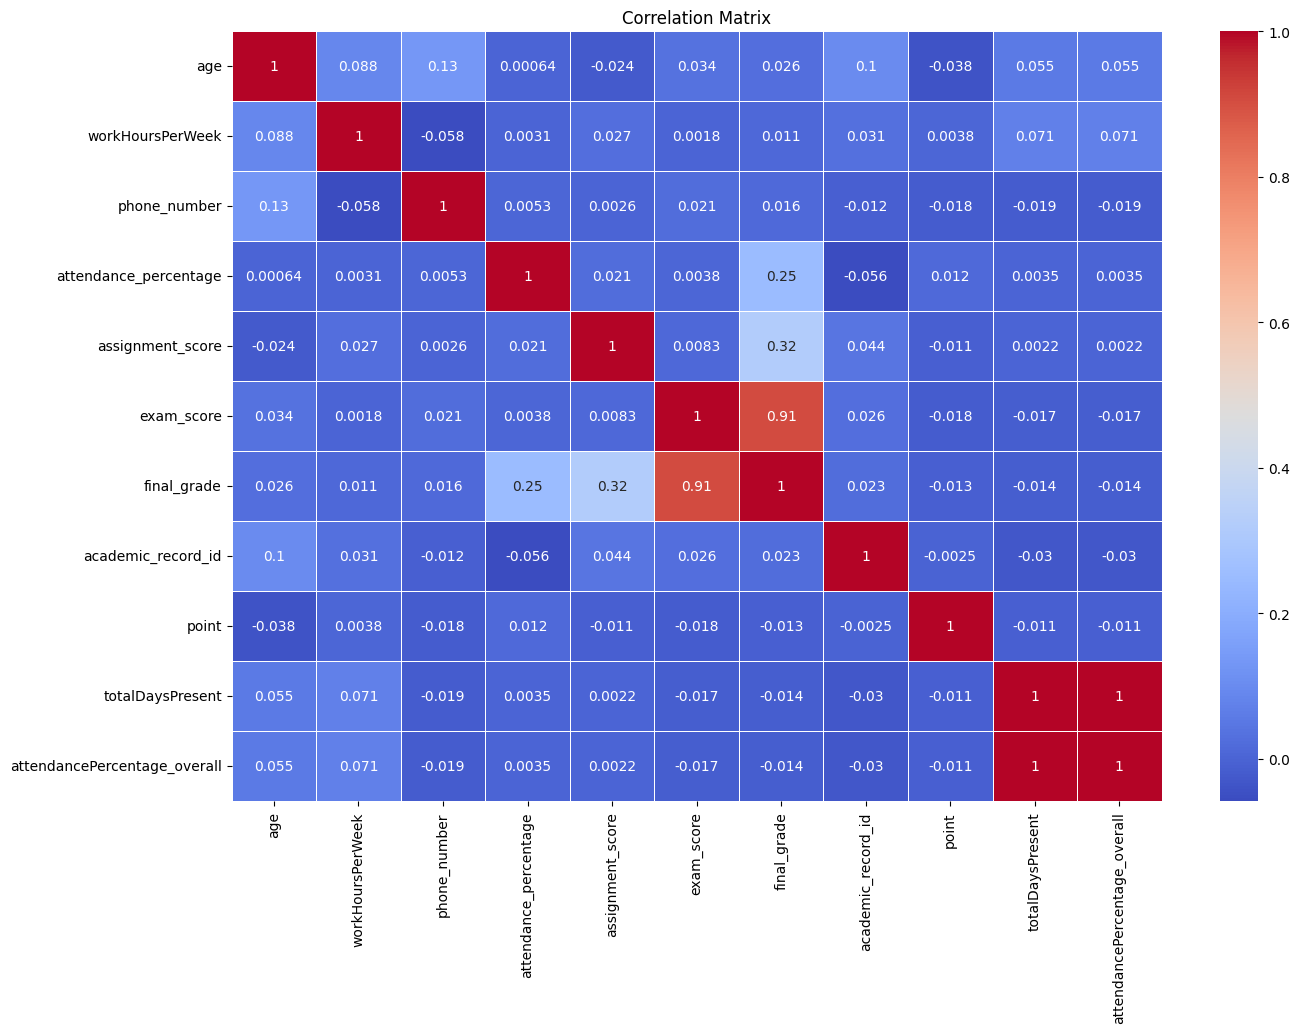

In [ ]:
df_numeric = data.select_dtypes(include=['float64', 'int64'])


correlation_matrix = df_numeric.corr()


plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


The correlation matrix reveals a strong positive correlation of 0.91 between exam scores and final grades, while the correlation between assignment scores and final grades is relatively weak at 0.32.

The strong correlation of 0.91 between exam scores and final grades underscores the critical role that exams play in determining academic success. Schools should leverage this insight to enhance exam preparation and also consider diverse assessment methods

 Meanwhile, the weaker correlation of 0.32 with assignment scores indicates that while they are important, they may not hold the same weight in evaluating overall student performance. Regular monitoring of these correlations will facilitate continuous improvement in educational practices.

### ***D. Socio-Economic Factors Affecting Exam Performance***

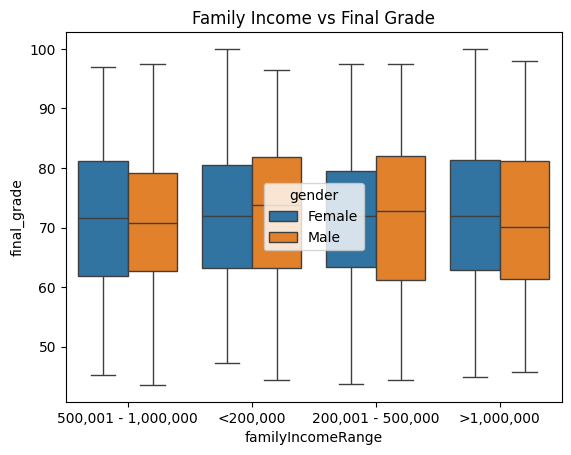

In [ ]:
# Family Income vs Final Grade
sns.boxplot(x='familyIncomeRange', y='final_grade', data=data, hue = 'gender')
plt.title('Family Income vs Final Grade')
plt.show()

The box plot displays the distribution of final grades across different family income ranges, with gender differentiated by color.

The box plot reveals an unexpected relationship between family income and final grades. Specifically, students from the highest family income range show lower median final grades, while those from the lowest family income range exhibit higher median final grades.

The surprising relationship between family income and final grades indicates that socioeconomic status is not the sole predictor of academic success. Instead, it highlights the importance of understanding the complex interplay between motivation, engagement, and external pressures that affect students from different backgrounds.

### ***E. Attendance and Resource Access Analysis***

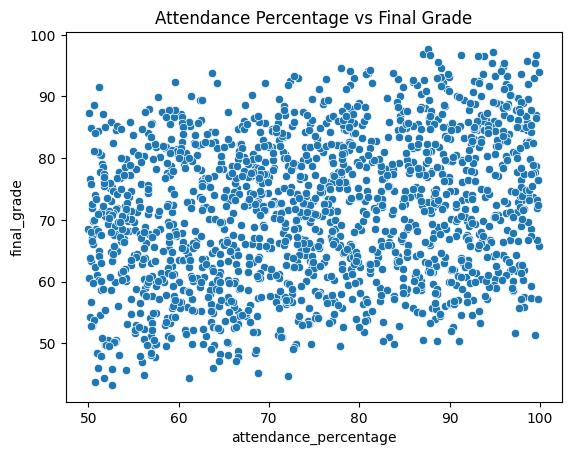

In [ ]:
# Attendance Percentage vs Final Grade
sns.scatterplot(x='attendance_percentage', y='final_grade', data=data)
plt.title('Attendance Percentage vs Final Grade')
plt.show()


The scatter plot visualizes the relationship between attendance percentage and final grade for students. Each point represents a student, with their attendance percentage plotted on the x-axis and their final grade on the y-axis.

The scatter plot illustrates that there is no discernible pattern or trend between attendance percentage and final grade. The data points appear evenly scattered across the plot, indicating a random distribution.

 This insight highlights the importance of exploring other influencing factors and taking a comprehensive approach to support students in improving their overall performance.

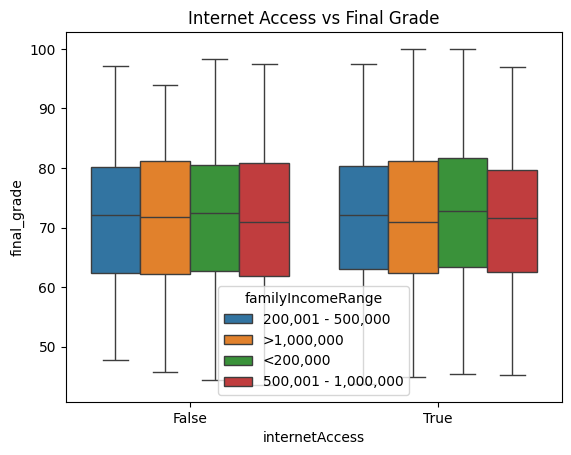

In [ ]:
# Internet Access vs Final Grade
sns.boxplot(x='internetAccess', y='final_grade', data=data, hue='familyIncomeRange')
plt.title('Internet Access vs Final Grade')
plt.show()

The box plot illustrates the relationship between internet access (categories such as "Yes" or "No") and final grades, segmented by family income range. This visualization allows for a comparison of academic performance based on the availability of internet access, while also taking into account the socioeconomic status of students.

The box plot indicates that there is no significant difference in the final grades between students with internet access and those without. Both groups show similar medians and ranges of final grades, suggesting that internet connectivity does not have a direct influence on students' academic performance in this dataset.

# **TEACHERS' DATA**

---



In [ ]:
data2 = pd.read_csv('/content/teachers_df.csv')

In [ ]:
data2.head()

,teacher_id,teacher_name,teacher_email,salary_range,department,qualification,employmentStatus,gender,yearsOfExperience,phone_number
0,OGBTeacher/2024/0,Mrs. Amaka Adegoke,AmakaAdegoke@gmail.com,"#100,000 - #150,000",Geography,Masters,Full-time,Male,27,2345737789650
1,OGBTeacher/2024/1,Mrs. Ndidi Ogunmola,NdidiOgunmola@gmail.com,"<#50,000",Computer Studies,Diploma,Part-time,Female,27,2342739036806
2,OGBTeacher/2024/2,Mrs. Nkeiru Olaniyan,NkeiruOlaniyan@gmail.com,"#150,000+",History,PhD,Part-time,Male,20,2342119819986
3,OGBTeacher/2024/3,Mrs. Gbenga Adebayo,GbengaAdebayo@gmail.com,"#50,001 - #100,000",Civic Education,PhD,Part-time,Female,10,2349229145004
4,OGBTeacher/2024/4,Mr. Gbenga Chukwuma,GbengaChukwuma@gmail.com,"<#50,000",Computer Studies,Masters,Full-time,Female,6,2348565577212


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   teacher_id         25 non-null     object
 1   teacher_name       25 non-null     object
 2   teacher_email      25 non-null     object
 3   salary_range       25 non-null     object
 4   department         25 non-null     object
 5   qualification      25 non-null     object
 6   employmentStatus   25 non-null     object
 7   gender             25 non-null     object
 8   yearsOfExperience  25 non-null     int64 
 9   phone_number       25 non-null     int64 
dtypes: int64(2), object(8)
memory usage: 2.1+ KB


In [ ]:
data2.describe()

,yearsOfExperience,phone_number
count,25.000000,2.500000e+01
mean,19.160000,2.346348e+12
std,8.459117,2.796803e+09
min,5.000000,2.341439e+12
25%,10.000000,2.343478e+12
50%,21.000000,2.347524e+12
75%,27.000000,2.348566e+12
max,30.000000,2.349657e+12


In [ ]:
data2.columns

Index(['teacher_id', 'teacher_name', 'teacher_email', 'salary_range',
       'department', 'qualification', 'employmentStatus', 'gender',
       'yearsOfExperience', 'phone_number'],
      dtype='object')

## ***UNIVARIATE ANALYSIS***

In [ ]:
numerical_df2 = data2.select_dtypes(include=['number'])

numerical_df2

,yearsOfExperience,phone_number
0,27,2345737789650
1,27,2342739036806
2,20,2342119819986
3,10,2349229145004
4,6,2348565577212
5,21,2349298568776
6,8,2349353816138
7,21,2342671071007
8,5,2346033088298
9,22,2343983274325


In [ ]:
# Summary statistics for numerical variables
numeric_features2 = ['yearsOfExperience']
summary_stats2 = data2[numeric_features2].describe()
summary_stats2


,yearsOfExperience
count,25.000000
mean,19.160000
std,8.459117
min,5.000000
25%,10.000000
50%,21.000000
75%,27.000000
max,30.000000


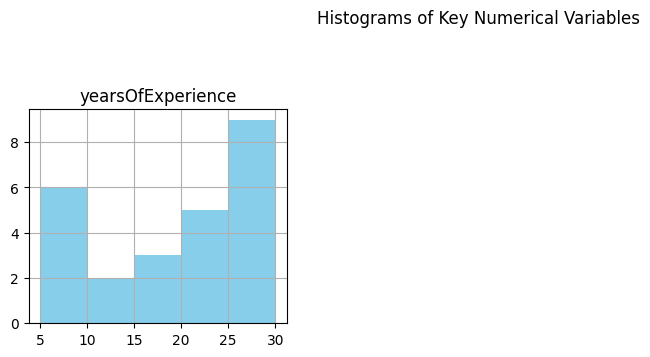

In [ ]:
# Plot histogram for numerical features
data2[numeric_features2].hist(bins=5, figsize=(12, 10), layout=(3, 3), color='skyblue')
plt.suptitle('Histograms of Key Numerical Variables')
plt.show()


The histogram shows the distribution of teachers' years of experience. This can indicate how experienced the teaching staff is and can reveal patterns regarding how teacher experience correlates with student performance.

The histogram reveals a bimodal (or multimodal) distribution of teachers’ years of experience, indicating two distinct groups(5-10 years and 25-30 years) within the teaching staff.

This suggests a diverse teaching staff with varying levels of expertise. This diversity presents both challenges and opportunities for student performance. By recognizing and addressing the distinct needs of inexperienced and experienced teachers, schools can implement strategies that promote effective teaching practices, enhance student learning, and improve overall academic outcomes.

In [ ]:
categorical_df2 = data2.select_dtypes(include=['object'])

categorical_df2.head(2)

,teacher_id,teacher_name,teacher_email,salary_range,department,qualification,employmentStatus,gender
0,OGBTeacher/2024/0,Mrs. Amaka Adegoke,AmakaAdegoke@gmail.com,"#100,000 - #150,000",Geography,Masters,Full-time,Male
1,OGBTeacher/2024/1,Mrs. Ndidi Ogunmola,NdidiOgunmola@gmail.com,"<#50,000",Computer Studies,Diploma,Part-time,Female


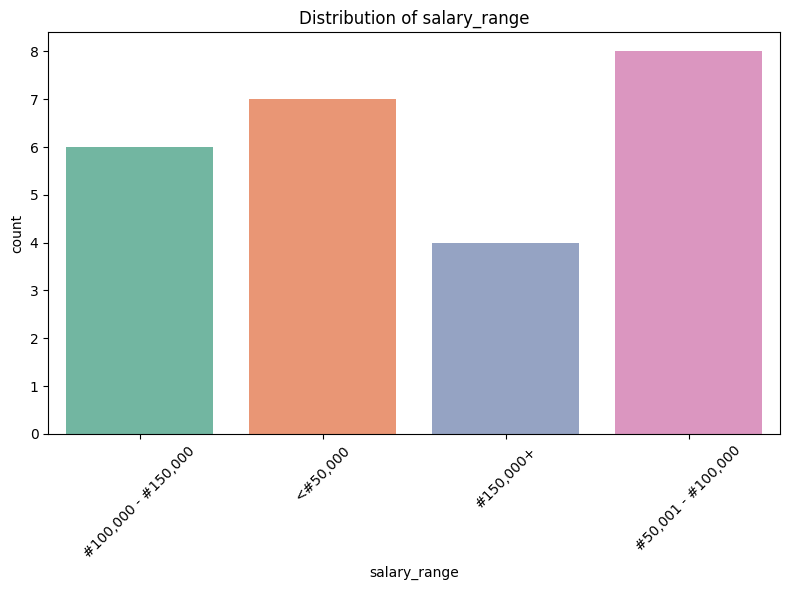

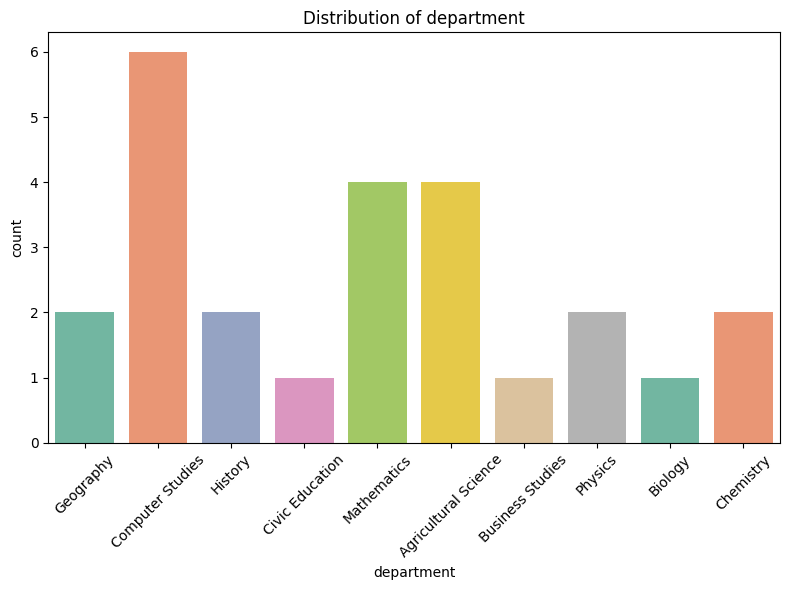

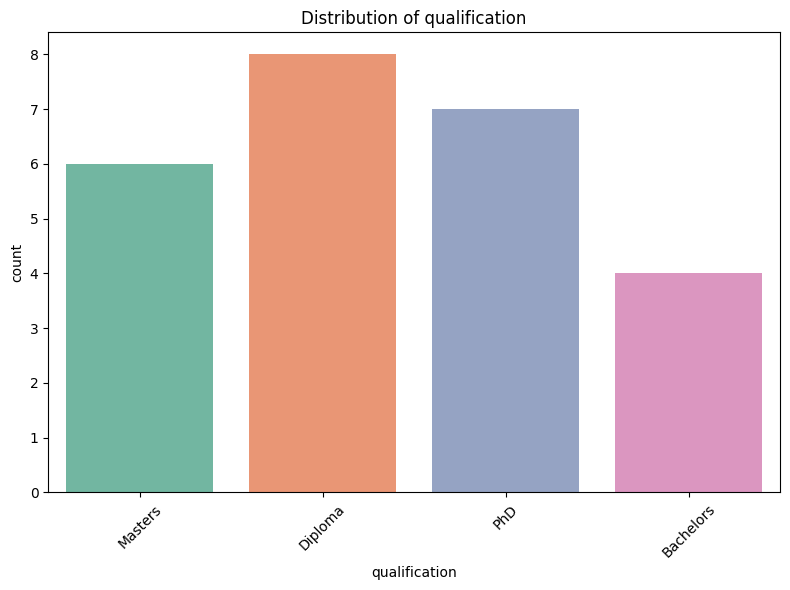

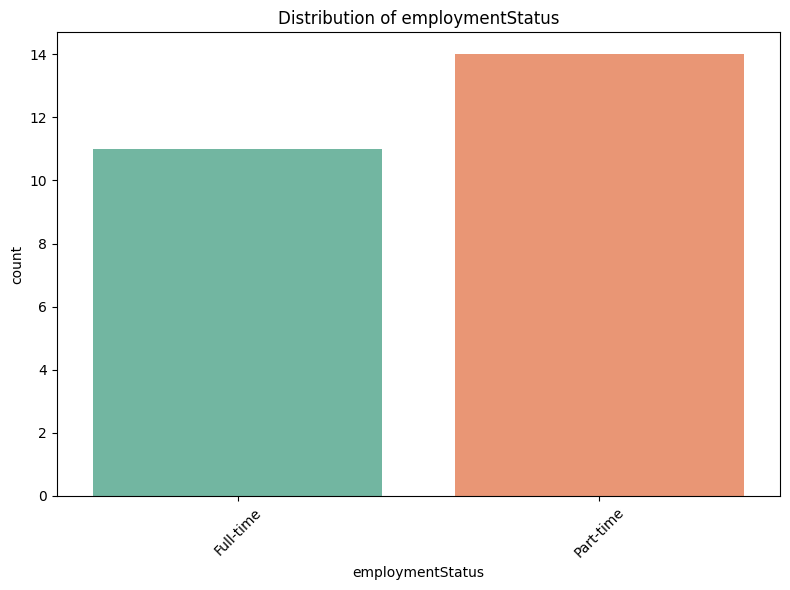

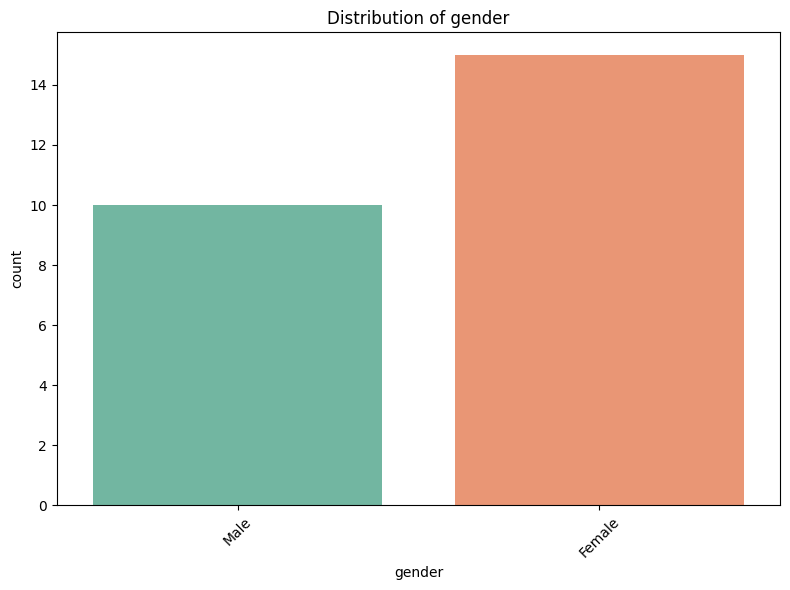

In [ ]:
categorical_bar2 = categorical_df2.drop(columns=['teacher_id', 'teacher_name', 'teacher_email' ])
# Plot bar plots for all categorical features
for feature in categorical_bar2:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data2, palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


-> Salary

The bar plot indicates that a significant number of teachers fall into the lower salary ranges, with fewer teachers represented in higher salary brackets

The observation of a significant number of teachers in lower salary ranges raises concerns about teacher retention, quality of education, and professional development opportunities. Addressing these issues through better compensation and resource allocation can lead to enhanced job satisfaction among teachers and, consequently, improved academic performance among students.

->Department

The bar plot indicates a substantial disparity in the number of teachers across various departments, with computer science having the highest count.

 Students in underrepresented subjects may not receive the same level of attention and resources as those in more populated departments. This discrepancy could negatively affect student engagement and performance, leading to disparities in academic achievement across different subjects

 -> Emplotment status

 The bar plot illustrates a significant prevalence of part-time teachers compared to full-time teachers within the school’s staff.

 The larger number of part-time teachers within the school indicates potential challenges related to stability, commitment, and the quality of education provided. Addressing these issues by hiring more full-time educators and ensuring adequate support for part-time staff can help create a more consistent and supportive learning environment for students, ultimately leading to improved academic outcomes

## ***BIVARIATE ANALYSIS***

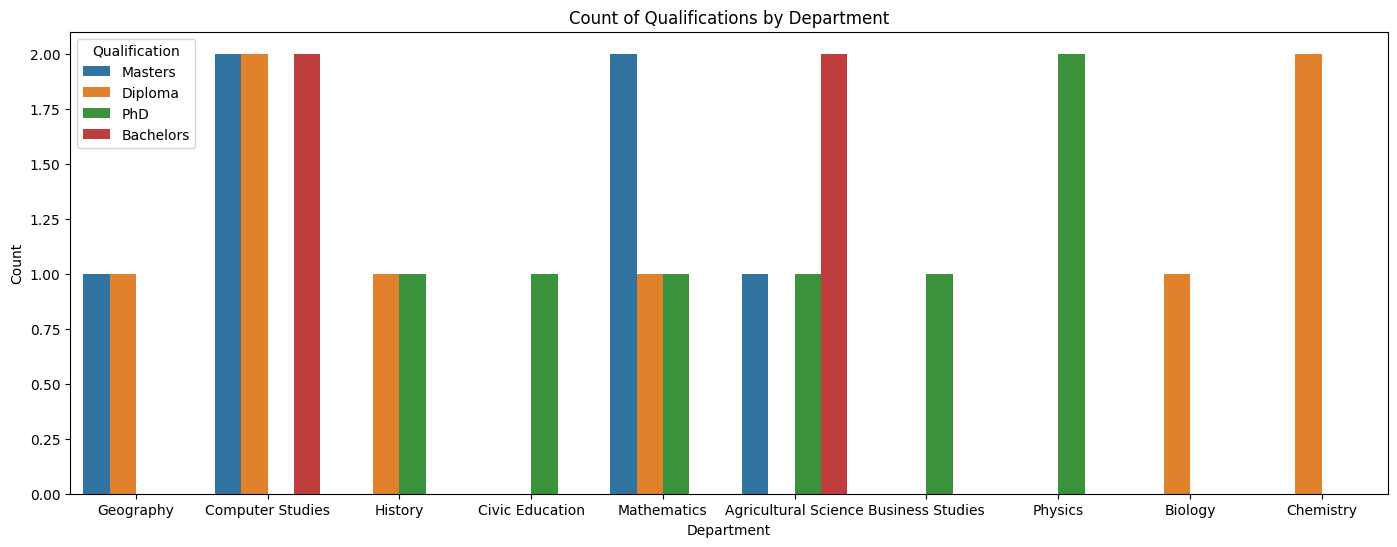

In [ ]:

# Department vs. Qualification
plt.figure(figsize=(17, 6))
sns.countplot(data=data2, x='department', hue='qualification')
plt.title('Count of Qualifications by Department')
plt.ylabel('Count')
plt.xlabel('Department')
plt.legend(title='Qualification')
plt.show()


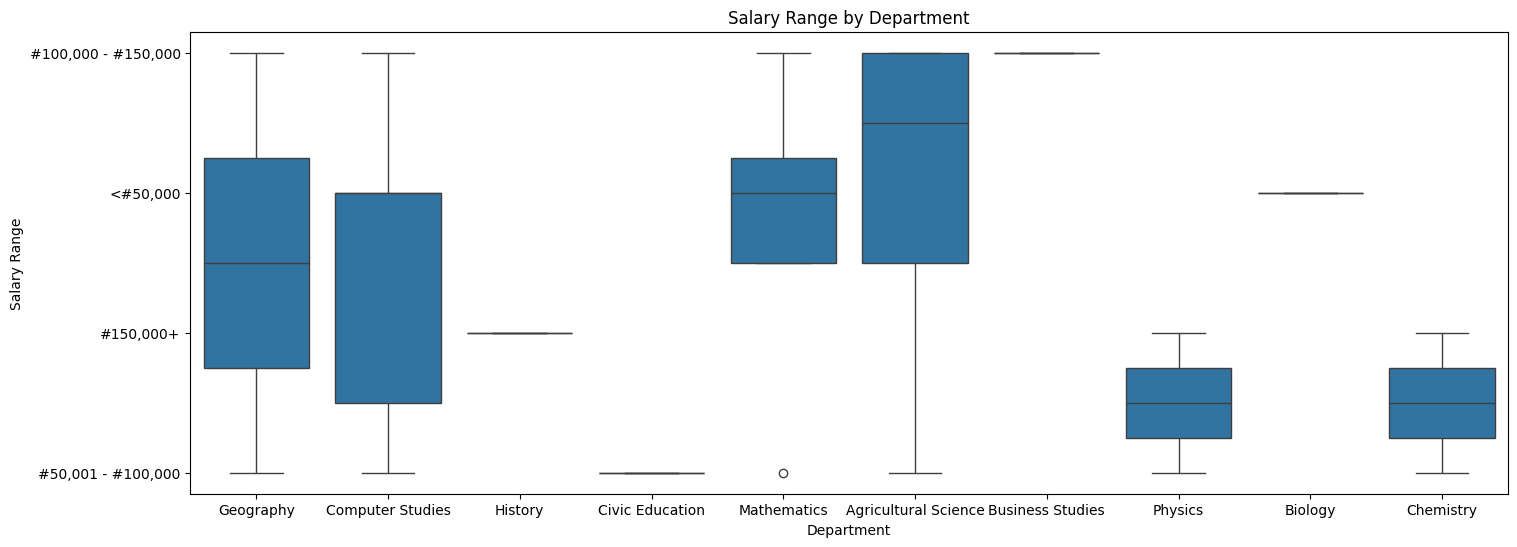

In [ ]:
# Department vs. Salary Range
plt.figure(figsize=(17, 6))
sns.boxplot(data=data2, x='department', y='salary_range')
plt.title('Salary Range by Department')
plt.ylabel('Salary Range')
plt.xlabel('Department')
plt.show()


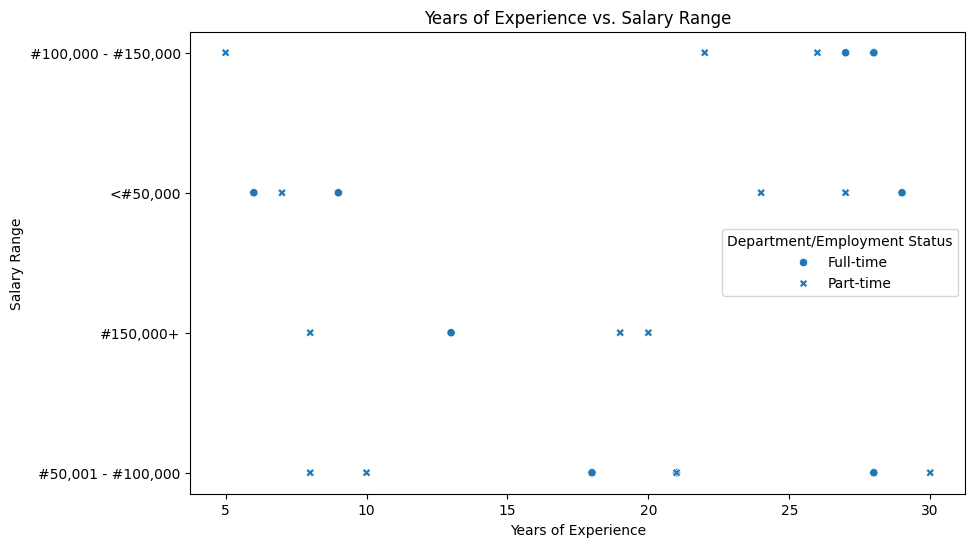

In [ ]:
# Years of Experience vs. Salary Range
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data2, x='yearsOfExperience', y='salary_range', style='employmentStatus')
plt.title('Years of Experience vs. Salary Range')
plt.ylabel('Salary Range')
plt.xlabel('Years of Experience')
plt.legend(title='Department/Employment Status')
plt.show()


## ***Multivariate Analysis***

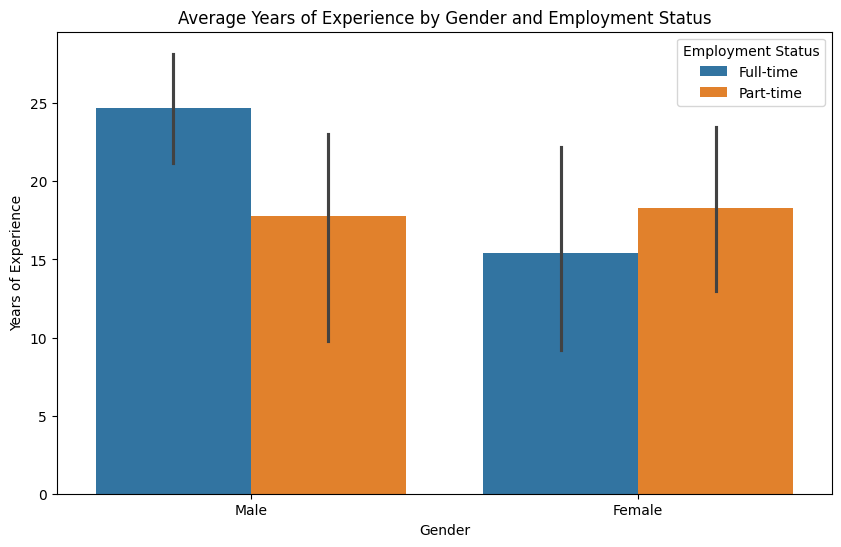

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data2, x='gender', y='yearsOfExperience', hue='employmentStatus')
plt.title('Average Years of Experience by Gender and Employment Status')
plt.ylabel('Years of Experience')
plt.xlabel('Gender')
plt.legend(title='Employment Status')
plt.show()
